### Causual Inference

In [ ]:
! pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
import pandas as pd

#### Loading libraries


#### Reading News article data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/DBA\ thesis/'Literature Review(DBA)'/Thesis/DBA-20220530T051925Z-001/DBA

/content/gdrive/MyDrive/DBA thesis/Literature Review(DBA)/Thesis/DBA-20220530T051925Z-001/DBA


In [ ]:
!pwd

/content/gdrive/MyDrive/DBA thesis/Literature Review(DBA)/Thesis/DBA-20220530T051925Z-001/DBA


In [ ]:
!ls data

 causality_results_20.xlsx
 causality_results_30.xlsx
 causality_results.xlsx
 DoWhy_Count.csv
 dowhyresult
 dowhyresult.pkl
 dowhy_results_analysed.xlsx
 dowhy_results_commulative.csv
 dowhy_results.csv
 drive-download-20220621T162347Z-001
 drive-download-20220621T162347Z-001.zip
 Economic_article_results.csv
 exchange_rates
'Final Analysis.xlsx'
 full_data.csv
 global_indices
 Granger_Causality_Vote.csv
 GRU_Count.csv
 intermediate_results
 LSTM_Count.csv
 news_articles
 non_causality_res.pkl
 only_exchange_rate.csv
 only_global_indices.csv
 only_sentiment_normal_df.csv
 price_usdinr_merged.csv
 result_non_causality_df_1.csv
 result_non_causality_df_analysis.xlsx
 result_non_causality_df.csv
 result_non_causality_df_lstm.csv
 sentiment_all_exch_rate_all_indices.csv
 sentiment_all_exch_rate_Df.csv
 sentiment_usdinr_merged.csv
 short_data.csv
 text_usdinr_merged.csv
'Untitled Document1.txt'


##### Loading data from money control

##### Preprocessing function

In [ ]:
start_date = "2018-01-01"
end_date = "2021-12-31"
def data_preprocess(df,start_date,end_date):
  df = df.replace(r'\n',' ', regex=True)
  ##converting date_list to datetime format
  df['date_time']=pd.to_datetime(df['date_list'],utc=False)
  ##Concatenating title and news_headlines
  df['title_and_news_headlines']=df['title']+'. '+df['news_headline']
  # Dropping date_list,title,news_headlines and Unnamed: 0
  if 'Unnamed: 0' in df.columns:
    df.drop(columns=['date_list','Unnamed: 0'],axis=0,inplace=True)
  else:
    df.drop(columns=['date_list'],axis=0,inplace=True)
  # filtering money_control dataframe on the basis of date
  after_start_date = df["date_time"] >= start_date
  before_end_date = df["date_time"] <= end_date
  between_two_dates = after_start_date & before_end_date
  df=df.loc[between_two_dates]
  df['date_time']=df['date_time'].dt.date
  return df

Running pre-processing for financial times

In [ ]:
final_times_df=pd.read_csv('data/news_articles/Financial_Times_final.csv')

In [ ]:
final_times_df=data_preprocess(final_times_df,start_date,end_date)

In [ ]:
final_times_df['date_time']=pd.to_datetime(final_times_df['date_time'])

In [ ]:
final_times_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 0 to 3218
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     3219 non-null   object        
 1   news_headline             3219 non-null   object        
 2   date_time                 3219 non-null   datetime64[ns]
 3   title_and_news_headlines  3219 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 125.7+ KB


Running pre-processing for money control

In [ ]:
money_control_df=pd.read_csv('data/news_articles/money_control_news_2.csv')

In [ ]:
money_control_df=data_preprocess(money_control_df,start_date,end_date)

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [ ]:
money_control_df['date_time']=pd.to_datetime(money_control_df['date_time'])

In [ ]:
import numpy as np
set(np.unique(money_control_df['date_time']))-set(np.unique(final_times_df['date_time']))

{numpy.datetime64('2018-01-06T00:00:00.000000000'),
 numpy.datetime64('2018-01-08T00:00:00.000000000'),
 numpy.datetime64('2018-01-09T00:00:00.000000000'),
 numpy.datetime64('2018-01-10T00:00:00.000000000'),
 numpy.datetime64('2018-01-11T00:00:00.000000000'),
 numpy.datetime64('2018-01-14T00:00:00.000000000'),
 numpy.datetime64('2018-01-27T00:00:00.000000000'),
 numpy.datetime64('2018-02-02T00:00:00.000000000'),
 numpy.datetime64('2018-02-03T00:00:00.000000000'),
 numpy.datetime64('2018-02-04T00:00:00.000000000'),
 numpy.datetime64('2018-02-05T00:00:00.000000000'),
 numpy.datetime64('2018-02-06T00:00:00.000000000'),
 numpy.datetime64('2018-02-07T00:00:00.000000000'),
 numpy.datetime64('2018-02-08T00:00:00.000000000'),
 numpy.datetime64('2018-02-12T00:00:00.000000000'),
 numpy.datetime64('2018-02-15T00:00:00.000000000'),
 numpy.datetime64('2018-02-24T00:00:00.000000000'),
 numpy.datetime64('2018-02-25T00:00:00.000000000'),
 numpy.datetime64('2018-02-26T00:00:00.000000000'),
 numpy.datet

Pre-processing for the hindu news

In [ ]:
the_hindu_df=pd.read_csv('data/news_articles/The_Hindu.csv')

In [ ]:
the_hindu_df=data_preprocess(the_hindu_df,start_date,end_date)

In [ ]:
the_hindu_df

title  \
100    Wheat exports jumped to $872 million in April...   
101    Fiscal deficit narrowed in April-November to ...   
102    No extension of IT return filing deadline, sa...   
103    GST Council defers implementation of tax rate...   
105               RBI extends KYC deadline to March 31    
...                                                 ...   
4039              New helpline for income tax e-filing    
4042               Why is the fiscal deficit widening?    
4047   New highs in FDI inflow likely this year, in ...   
4167   S&P keeps India rating unchanged with stable ...   
4298   Modi's policies eschew populism, enjoy public...   

                                          news_headline   date_time  \
100               Bangladesh top destination: Ministry   2021-12-31   
101    The deficit for eight months stood at ₹6.96 t...  2021-12-31   
102    Tarun Bajaj said returns filed so far are mor...  2021-12-31   
103    Currently, tax rate on manmade fibre (MMF) is...  2021-12-31   
105    The Reserve Bank of India (RBI) extended the ...  2021-12-31   
...                                                 ...         ...   
4039   The Income Tax Department on Monday notified ...  2018-01-01   
4042   The government’s fiscal deficit up to Novembe...  2018-01-01   
4047   ‘However, Centre needs to address reporting p...  2018-01-17   
4167   Despite one-off factors like demonetisation a...  2018-02-03   
4298   Asserts criticism comes only from “opportunis...  2018-01-23   

                               title_and_news_headlines  
100    Wheat exports jumped to $872 million in April...  
101    Fiscal deficit narrowed in April-November to ...  
102    No extension of IT return filing deadline, sa...  
103    GST Council defers implementation of tax rate...  
105    RBI extends KYC deadline to March 31 .  The R...  
...                                                 ...  
4039   New helpline for income tax e-filing .  The I...  
4042   Why is the fiscal deficit widening? .  The go...  
4047   New highs in FDI inflow likely this year, in ...  
4167   S&P keeps India rating unchanged with stable ...  
4298   Modi's policies eschew populism, enjoy public...  

[3838 rows x 4 columns]

##### Loading spacy model

In [ ]:
print (spacy.__version__)

3.3.0


In [ ]:
!python -m spacy download en_core_web_trf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 460.3 MB 24 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
! pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nlp=spacy.load('en_core_web_trf')

All entities contains all the named entities along with news_date

In [ ]:
all_entities=['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']

Initialising two dataframe one is money_control_named_entities_df and other would be the_hindu_named_entities_df

In [ ]:
money_control_named_entities_df=pd.DataFrame(columns=all_entities)
the_hindu_entities_df=pd.DataFrame(columns=all_entities)
final_times_entities_df=pd.DataFrame(columns=all_entities)

In [ ]:
#NEWS_DATE final_times_df

In [ ]:
def intialise_name_entities_dict(all_entities):
  entities_dict={}
  for entity in all_entities:
    entities_dict[entity]=0
  return entities_dict


In [ ]:
#entities_dict

In [ ]:
small_the_hindu_df=the_hindu_df.head(100)

In [ ]:
def no_of_entities_dict(docs,entities_dict):
  for doc in docs:
    for ent in doc.ents:
      entities_dict[ent.label_]+=1
  return entities_dict

In [ ]:
def convert_text_to_entities_dataframe(text_df,entities_df,all_entities):
  for index, row in text_df.iterrows():
    entities_dict=intialise_name_entities_dict(all_entities)
    doc_title=nlp(row['title'])
    doc_headline=nlp(str(row['news_headline']))
    docs=[doc_title,doc_headline]
    filled_entities_dict=no_of_entities_dict(docs,entities_dict)
    filled_entities_dict['NEWS_DATE']=row['date_time']
    # print(filled_entities_dict)
    entities_df=entities_df.append(filled_entities_dict,ignore_index=True)
  return entities_df


converting the financial times news to entities dataframe

In [ ]:
text_df=final_times_df
entities_df=final_times_entities_df
entities_df=convert_text_to_entities_dataframe(text_df,entities_df,all_entities)
entities_df.to_csv('data/news_articles/processed_financial_times.csv')

###### converting the hindu news data frame to entities dataframe

In [ ]:
text_df=the_hindu_df
entities_df=the_hindu_entities_df
entities_df=convert_text_to_entities_dataframe(text_df,entities_df,all_entities)
entities_df.to_csv('data/news_articles/processed_the_hindu_1.csv')

###### converting the money control data frame to entities dataframe

In [ ]:
money_control_df['date_time']=pd.to_datetime(money_control_df['date_time'])

In [ ]:
text_df=money_control_df
entities_df=money_control_named_entities_df
entities_df=convert_text_to_entities_dataframe(text_df,entities_df,all_entities)
entities_df.to_csv('data/news_articles/processed_money_control_1.csv')

##### Sentiment analysis over the news datasets

###### installing flair for sentiment analysis

In [ ]:
! pip install Flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.1 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 19.7 MB 58.9 MB/s 
     |████████████████████████████████| 981 kB 59.0 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 1.2 MB 59.2 MB/s 
     |████████████████████████████████| 788 kB 61.2 MB/s 
     |████████████████████████████████| 1.6 MB 55.0 MB/s 
     |████████████████████████████████| 199 kB 67.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=5c60462caa5972de6a6c785fde3f08b2aa5d02206624372c3bd6e8e04d0dd80f
  Stored in directory: /root/.cache/pip/wheels/26/70/6a/1c79e59951a41b4045497da187b2724f5659ca64033cf4548e
  Created wheel for overrides: filename=overrides-3.1.0-py3-none-any.whl 

In [ ]:
import flair

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
classifier = TextClassifier.load('en-sentiment')

2022-05-24 17:25:22,001 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
sentence = Sentence('States demand GST rate hike on textiles be put on hold. In the pre-budget meeting chaired by Union FM Nirmala Sitharaman, states like Gujarat, West Bengal, Delhi, Rajasthan and Tamil Nadu said that they are not in favour of a hike in GST rate on textiles to 12 per cent, from 5 per cent currently, with effect from January 1, 2022.')
classifier.predict(sentence)
# print sentence with predicted labels
print('Sentence above is: ', sentence.labels[0].value)

Sentence above is:  NEGATIVE


###### Generating sentiment for title_and_headlines for money control and the hindu news articles

Initialising two dataframe for money control and the hindu respectively

In [ ]:
money_control_sentiment_df=pd.DataFrame(columns=['NEWS_DATE','POSITIVE','NEGATIVE'])
the_hindu_sentiment_df=pd.DataFrame(columns=['NEWS_DATE','POSITIVE','NEGATIVE'])
financial_times_sentiment_df=pd.DataFrame(columns=['NEWS_DATE','POSITIVE','NEGATIVE'])

In [ ]:
def convert_text_to_sentiment_dataframe(text_df,sentiment_df):
  for index,row in text_df.iterrows():
    sentiment_dict={'POSITIVE':0,'NEGATIVE':0}
    if row['title_and_news_headlines'] is not None and str(row['title_and_news_headlines'])!='nan':
      sentence=Sentence(row['title_and_news_headlines'])
      classifier.predict(sentence)
      sentiment_dict[sentence.labels[0].value]=sentence.labels[0].score
      sentiment_dict['NEWS_DATE']=row['date_time']
      sentiment_df=sentiment_df.append(sentiment_dict,ignore_index=True)
  return sentiment_df


populating financial_times_sentiments_df

In [ ]:
text_df=final_times_df
sentiment_df=financial_times_sentiment_df
financial_times_sentiment_df=convert_text_to_sentiment_dataframe(text_df,sentiment_df)
financial_times_sentiment_df.to_csv('data/news_articles/sentiment_financial_times.csv')

populating money_control_sentiment_df

In [ ]:
text_df=money_control_df
sentiment_df=money_control_sentiment_df
money_control_sentiment_df=convert_text_to_sentiment_dataframe(text_df,sentiment_df)

In [ ]:
money_control_sentiment_df.to_csv('data/news_articles/sentiment_money_control.csv')

populating the hindu sentiment dataframe

In [ ]:
text_df=the_hindu_df
sentiment_df=the_hindu_sentiment_df
the_hindu_sentiment_df=convert_text_to_sentiment_dataframe(text_df,sentiment_df)
the_hindu_sentiment_df.to_csv('data/news_articles/sentiment_the_hindu.csv')

#### Data Preprocessing

###### Sum up all the entitites grouped by date for financial times

In [ ]:
!pwd

/content


In [ ]:
financial_times_named_entities_df=pd.read_csv('data/news_articles/processed_financial_times.csv')
financial_times_named_entities_df.drop(columns=['Unnamed: 0'],inplace=True)
financial_times_named_entities_df=financial_times_named_entities_df.groupby(['NEWS_DATE'],as_index=False).sum()
financial_times_named_entities_df.to_csv('data/news_articles/grouped_financial_times.csv')
financial_times_named_entities_df

NEWS_DATE  CARDINAL  DATE  EVENT  FAC  GPE  LANGUAGE  LAW  LOC  MONEY  \
0     2018-01-01         0     1      0    0    5         0    0    0      0   
1     2018-01-02         0     1      0    1    4         0    0    0      0   
2     2018-01-03         3     2      1    0    6         0    1    1      0   
3     2018-01-04         1     5      0    0    3         0    0    0      0   
4     2018-01-05         0     3      0    0    3         0    0    0      0   
...          ...       ...   ...    ...  ...  ...       ...  ...  ...    ...   
1042  2021-12-27         0     0      0    0    1         0    0    0      0   
1043  2021-12-28         2     0      0    0    0         0    0    0      0   
1044  2021-12-29         1     1      0    0    0         0    0    0      0   
1045  2021-12-30         0     0      0    0    2         1    0    1      0   
1046  2021-12-31         0     0      0    0    1         0    0    0      0   

      NORP  ORDINAL  ORG  PERCENT  PERSON  PRODUCT  QUANTITY  TIME  \
0        0        1    1        0       1        0         0     0   
1        2        0    2        1       0        0         0     0   
2        2        0    0        0       0        0         0     0   
3        1        1    4        1       0        0         0     0   
4        0        0    1        0       0        0         0     0   
...    ...      ...  ...      ...     ...      ...       ...   ...   
1042     0        0    0        0       1        0         0     0   
1043     0        0    0        1       0        0         0     0   
1044     3        0    0        0       1        0         0     0   
1045     0        0    0        0       1        0         0     0   
1046     0        0    0        0       2        0         0     0   

      WORK_OF_ART  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1042            0  
1043            0  
1044            0  
1045            0  
1046            0  

[1047 rows x 19 columns]

In [ ]:
all_entities=['NEWS_DATE','CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART','Nifty_Price']

In [ ]:
pd.read_csv('data/intermediate_results/entities_sentiment_merged_with_ndPrice_Df.csv')[['NEWS_DATE','GPE','GPE_MoneyControl','GPE_TheHindu']]

NEWS_DATE  GPE  GPE_MoneyControl  GPE_TheHindu
0    2018-01-01  0.0                14           0.0
1    2018-01-02  3.0                 9           3.0
2    2018-01-03  0.0                48           0.0
3    2018-01-04  NaN                36           NaN
4    2018-01-05  0.0                11           0.0
..          ...  ...               ...           ...
983  2021-12-24  NaN                 7           NaN
984  2021-12-27  0.0                 2           0.0
985  2021-12-28  NaN                11           NaN
986  2021-12-29  4.0                 1           4.0
987  2021-12-30  0.0                 9           0.0

[988 rows x 4 columns]

In [ ]:
financial_times_sentiments_df=pd.read_csv('data/news_articles/sentiment_financial_times.csv')
financial_times_sentiments_df.drop(columns=['Unnamed: 0'],inplace=True)
financial_times_sentiments_df=financial_times_sentiments_df.groupby(['NEWS_DATE'],as_index=False).sum()
financial_times_sentiments_df.to_csv('data/news_articles/grouped_financial_times_sentiments.csv')
financial_times_sentiments_df

NEWS_DATE  POSITIVE  NEGATIVE
0     2018-01-01  0.000000  5.925006
1     2018-01-02  1.383146  0.638772
2     2018-01-03  1.980525  0.704589
3     2018-01-04  1.511195  2.971677
4     2018-01-05  0.000000  2.573384
...          ...       ...       ...
1042  2021-12-27  0.000000  0.999438
1043  2021-12-28  0.000000  0.995099
1044  2021-12-29  1.642457  0.000000
1045  2021-12-30  0.587460  0.000000
1046  2021-12-31  0.999281  0.000000

[1047 rows x 3 columns]

###### Sum up all the entitites grouped by date for money control

In [ ]:
money_control_named_entities_df=pd.read_csv('data/news_articles/processed_money_control_1.csv')

In [ ]:
money_control_named_entities_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
money_control_named_entities_grouped_df=money_control_named_entities_df.groupby(['NEWS_DATE'],as_index=False).sum()

In [ ]:
money_control_named_entities_grouped_df.to_csv('data/news_articles/grouped_money_control.csv')

In [ ]:
money_control_named_entities_grouped_df

NEWS_DATE  CARDINAL  DATE  EVENT  FAC  GPE  LANGUAGE  LAW  LOC  MONEY  \
0     2018-01-01         9    37      1    1   14         0    0    0     11   
1     2018-01-02         6    20      0    0    9         0    4    0     10   
2     2018-01-03         8    37      0    2   48         0    4    4     32   
3     2018-01-04        18    70      3    1   36         0    0    2     19   
4     2018-01-05         8    41      1    2   11         0    0    0     30   
...          ...       ...   ...    ...  ...  ...       ...  ...  ...    ...   
1424  2021-12-25         0     0      0    0    0         0    0    0      0   
1425  2021-12-27         8    13      2    0    2         0    0    0      3   
1426  2021-12-28         7    23      0    0   11         0    0    0      0   
1427  2021-12-29         3    17      2    0    1         0    0    0      3   
1428  2021-12-30         1    10      0    0    9         0    2    0      2   

      NORP  ORDINAL  ORG  PERCENT  PERSON  PRODUCT  QUANTITY  TIME  \
0        0        2   46       10      11        0         6     0   
1        0        1   33        4      21        0         7     0   
2        2        0   31        6      18        0         5     1   
3        6        5  106       25      46        0         4     2   
4        5        5   47        4      19        0         1     3   
...    ...      ...  ...      ...     ...      ...       ...   ...   
1424     0        0    1        0       0        0         0     0   
1425     1        2   13        6       9        0         1     0   
1426     0        0   12        1       3        0         0     0   
1427     3        0   13        3       0        0         0     0   
1428     0        0    8        7       4        0         0     0   

      WORK_OF_ART  
0               0  
1               0  
2               0  
3               0  
4               2  
...           ...  
1424            0  
1425            0  
1426            0  
1427            0  
1428            1  

[1429 rows x 19 columns]

###### Sum up all the entities grouped by date for the hindu

In [ ]:
the_hindu_entities_df=pd.read_csv('data/news_articles/processed_the_hindu_1.csv')

In [ ]:
the_hindu_entities_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
the_hindu_entities_grouped_df=the_hindu_entities_df.groupby(['NEWS_DATE'],as_index=False).sum()

In [ ]:
the_hindu_entities_grouped_df

NEWS_DATE  CARDINAL  DATE  EVENT  FAC  GPE  LANGUAGE  LAW  LOC  MONEY  \
0     2018-01-01         2     3      0    0    0         0    0    0      0   
1     2018-01-02         1     7      0    0    3         0    0    0      0   
2     2018-01-03         0     1      0    0    0         0    0    0      0   
3     2018-01-05         1     2      0    0    0         0    0    0      0   
4     2018-01-06         0     5      0    0    3         0    0    0      2   
...          ...       ...   ...    ...  ...  ...       ...  ...  ...    ...   
1207  2021-12-26         0     6      0    0    6         0    0    0      2   
1208  2021-12-27         2    10      0    0    0         0    0    0      2   
1209  2021-12-29         0    12      0    0    4         0    0    0      0   
1210  2021-12-30         0     4      0    0    0         0    0    0      0   
1211  2021-12-31         0    16      0    0    2         0    0    0      2   

      NORP  ORDINAL  ORG  PERCENT  PERSON  PRODUCT  QUANTITY  TIME  \
0        0        1    2        1       0        0         0     0   
1        0        0    1        2       0        0         1     0   
2        0        0    1        0       0        0         0     0   
3        0        0    3        2       0        0         0     0   
4        0        0    5        1       2        0         1     0   
...    ...      ...  ...      ...     ...      ...       ...   ...   
1207     2        0    6        0       0        0         0     0   
1208     4        0    6        8       0        0         0     0   
1209     0        0   18        4       2        0         0     0   
1210     0        0    8        0       0        0         0     0   
1211     0        0   18        8       2        0         0     0   

      WORK_OF_ART  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1207            0  
1208            0  
1209            0  
1210            0  
1211            0  

[1212 rows x 19 columns]

In [ ]:
the_hindu_entities_grouped_df.to_csv('data/news_articles/grouped_the_hindu.csv')

###### mean the sentiments by date for money control

In [ ]:
sentiment_money_control_df=pd.read_csv('data/news_articles/sentiment_money_control.csv')

In [ ]:
sentiment_money_control_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
sentiment_money_control_grouped_df=sentiment_money_control_df.groupby(['NEWS_DATE'],as_index=False).sum()

In [ ]:
sentiment_money_control_grouped_df.to_csv('data/news_articles/grouped_money_control_sentiments.csv')

In [ ]:
sentiment_money_control_grouped_df

NEWS_DATE   POSITIVE   NEGATIVE
0     2018-01-01  11.047161  13.488099
1     2018-01-02   8.663063  12.266859
2     2018-01-03   6.373476  20.272146
3     2018-01-04   8.050940  37.851408
4     2018-01-05   5.917440  26.114586
...          ...        ...        ...
1423  2021-12-25   0.835966   0.000000
1424  2021-12-27   3.499479   4.845478
1425  2021-12-28   1.801830   6.575460
1426  2021-12-29   4.321918   7.812341
1427  2021-12-30   0.000000   8.593254

[1428 rows x 3 columns]

##### mean the sentiments by date for the hindu

In [ ]:
sentiment_the_hindu_df=pd.read_csv('data/news_articles/sentiment_the_hindu.csv')

In [ ]:
sentiment_the_hindu_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
sentiment_the_hindu_grouped_df=sentiment_the_hindu_df.groupby(['NEWS_DATE'],as_index=False).sum()

In [ ]:
sentiment_the_hindu_grouped_df.to_csv('data/news_articles/grouped_hindu_sentiments.csv')

In [ ]:
sentiment_the_hindu_grouped_df

NEWS_DATE  POSITIVE  NEGATIVE
0     2018-01-01  1.870578  0.992632
1     2018-01-02  2.751783  0.666371
2     2018-01-03  0.645391  0.000000
3     2018-01-05  0.000000  1.580029
4     2018-01-06  2.728858  1.972206
...          ...       ...       ...
1207  2021-12-26  0.000000  5.651082
1208  2021-12-27  2.901504  3.408256
1209  2021-12-29  1.731223  9.757745
1210  2021-12-30  3.533199  5.141939
1211  2021-12-31  1.779276  9.885115

[1212 rows x 3 columns]

##### Merging entities dataframes for money control and the hindu

In [ ]:
## loading Money Control and the hindu entities data in pandas
money_control_named_entities_grouped_df=pd.read_csv('data/news_articles/grouped_money_control.csv')
the_hindu_entities_grouped_df=pd.read_csv('data/news_articles/grouped_the_hindu.csv')
financial_times_entities_grouped_df=pd.read_csv('data/news_articles/grouped_financial_times.csv')

In [ ]:
#set(money_control_named_entities_grouped_df['NEWS_DATE'])-set(financial_times_entities_grouped_df['NEWS_DATE'])

In [ ]:
money_control_named_entities_grouped_df.head(2)

Unnamed: 0   NEWS_DATE  CARDINAL  DATE  EVENT  FAC  GPE  LANGUAGE  LAW  \
0           0  2018-01-01         9    37      1    1   14         0    0   
1           1  2018-01-02         6    20      0    0    9         0    4   

   LOC  MONEY  NORP  ORDINAL  ORG  PERCENT  PERSON  PRODUCT  QUANTITY  TIME  \
0    0     11     0        2   46       10      11        0         6     0   
1    0     10     0        1   33        4      21        0         7     0   

   WORK_OF_ART  
0            0  
1            0

In [ ]:
financial_times_entities_grouped_df['NEWS_DATE']=pd.to_datetime(financial_times_entities_grouped_df['NEWS_DATE'])
the_hindu_entities_grouped_df['NEWS_DATE']=pd.to_datetime(the_hindu_entities_grouped_df['NEWS_DATE'])
money_control_named_entities_grouped_df['NEWS_DATE']=pd.to_datetime(money_control_named_entities_grouped_df['NEWS_DATE'])

In [ ]:
entities_merged_Df=pd.merge(left=money_control_named_entities_grouped_df,right=the_hindu_entities_grouped_df,on="NEWS_DATE",how='left',suffixes=("_MoneyControl", "_TheHindu"))

In [ ]:
# entities_merged_Df=entities_merged_Df.drop(columns=['Unnamed: 0_MoneyControl','Unnamed: 0_FinancialTimes'])

In [ ]:
all_entities_merged_Df=pd.merge(left=entities_merged_Df,right=financial_times_entities_grouped_df,how='left',on="NEWS_DATE",suffixes=("_", "_Financial_times"))

In [ ]:
all_entities_merged_Df=all_entities_merged_Df.drop(columns=['Unnamed: 0_MoneyControl','Unnamed: 0_TheHindu','Unnamed: 0'])

In [ ]:
all_entities_merged_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1428
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   NEWS_DATE                 1429 non-null   datetime64[ns]
 1   CARDINAL_MoneyControl     1429 non-null   int64         
 2   DATE_MoneyControl         1429 non-null   int64         
 3   EVENT_MoneyControl        1429 non-null   int64         
 4   FAC_MoneyControl          1429 non-null   int64         
 5   GPE_MoneyControl          1429 non-null   int64         
 6   LANGUAGE_MoneyControl     1429 non-null   int64         
 7   LAW_MoneyControl          1429 non-null   int64         
 8   LOC_MoneyControl          1429 non-null   int64         
 9   MONEY_MoneyControl        1429 non-null   int64         
 10  NORP_MoneyControl         1429 non-null   int64         
 11  ORDINAL_MoneyControl      1429 non-null   int64         
 12  ORG_MoneyControl    

In [ ]:
# import datetime
# initial_date=datetime.datetime(2018,1,1)
# k=1461
# date_list=[initial_date + datetime.timedelta(days=idx) for idx in range(k)]

In [ ]:
# import numpy as np
# date_list.sort(reverse=True)

In [ ]:
# date_list

##### Merging sentiment data with merged_entities data

In [ ]:
## Loading grouped money control sentiments and grouped hindu sentiments in dataframe
sentiment_money_control_grouped_df=pd.read_csv('data/news_articles/grouped_money_control_sentiments.csv')
sentiment_the_hindu_grouped_df=pd.read_csv('data/news_articles/grouped_hindu_sentiments.csv')
financial_times_entities_grouped_sentiment_df=pd.read_csv('data/news_articles/grouped_financial_times_sentiments.csv')

In [ ]:
sentiment_money_control_grouped_df['NEWS_DATE']=pd.to_datetime(sentiment_money_control_grouped_df['NEWS_DATE'])
sentiment_the_hindu_grouped_df['NEWS_DATE']=pd.to_datetime(sentiment_the_hindu_grouped_df['NEWS_DATE'])
financial_times_entities_grouped_sentiment_df['NEWS_DATE']=pd.to_datetime(financial_times_entities_grouped_sentiment_df['NEWS_DATE'])

In [ ]:
## Merging money control sentiment data with merged entities data
entities_sentiment_merged_Df=pd.merge(left=all_entities_merged_Df,right=sentiment_money_control_grouped_df,on="NEWS_DATE",how='left')

In [ ]:
## Merging the hindu sentiment data with merged entities and sentiment data
entities_sentiment_merged_Df=pd.merge(left=entities_sentiment_merged_Df,right=sentiment_the_hindu_grouped_df,on="NEWS_DATE",how='left',suffixes=("_MoneyControl","_TheHindu"))

In [ ]:
entities_sentiment_merged_Df=pd.merge(left=entities_sentiment_merged_Df,right=financial_times_entities_grouped_sentiment_df,on="NEWS_DATE",how='left',suffixes=("_","_FinancialTimes"))

In [ ]:
entities_sentiment_merged_Df=entities_sentiment_merged_Df.drop(columns=['Unnamed: 0_MoneyControl','Unnamed: 0_TheHindu','Unnamed: 0'])

In [ ]:
entities_sentiment_merged_Df

NEWS_DATE  CARDINAL_MoneyControl  DATE_MoneyControl  EVENT_MoneyControl  \
0    2018-01-01                      9                 37                   1   
1    2018-01-02                      6                 20                   0   
2    2018-01-03                      8                 37                   0   
3    2018-01-04                     18                 70                   3   
4    2018-01-05                      8                 41                   1   
...         ...                    ...                ...                 ...   
1424 2021-12-25                      0                  0                   0   
1425 2021-12-27                      8                 13                   2   
1426 2021-12-28                      7                 23                   0   
1427 2021-12-29                      3                 17                   2   
1428 2021-12-30                      1                 10                   0   

      FAC_MoneyControl  GPE_MoneyControl  LANGUAGE_MoneyControl  \
0                    1                14                      0   
1                    0                 9                      0   
2                    2                48                      0   
3                    1                36                      0   
4                    2                11                      0   
...                ...               ...                    ...   
1424                 0                 0                      0   
1425                 0                 2                      0   
1426                 0                11                      0   
1427                 0                 1                      0   
1428                 0                 9                      0   

      LAW_MoneyControl  LOC_MoneyControl  MONEY_MoneyControl  ...  PRODUCT  \
0                    0                 0                  11  ...      0.0   
1                    4                 0                  10  ...      0.0   
2                    4                 4                  32  ...      0.0   
3                    0                 2                  19  ...      0.0   
4                    0                 0                  30  ...      0.0   
...                ...               ...                 ...  ...      ...   
1424                 0                 0                   0  ...      NaN   
1425                 0                 0                   3  ...      0.0   
1426                 0                 0                   0  ...      0.0   
1427                 0                 0                   3  ...      0.0   
1428                 2                 0                   2  ...      0.0   

      QUANTITY  TIME  WORK_OF_ART  POSITIVE_MoneyControl  \
0          0.0   0.0          0.0              11.047161   
1          0.0   0.0          0.0               8.663063   
2          0.0   0.0          0.0               6.373476   
3          0.0   0.0          0.0               8.050940   
4          0.0   0.0          0.0               5.917440   
...        ...   ...          ...                    ...   
1424       NaN   NaN          NaN               0.835966   
1425       0.0   0.0          0.0               3.499479   
1426       0.0   0.0          0.0               1.801830   
1427       0.0   0.0          0.0               4.321918   
1428       0.0   0.0          0.0               0.000000   

      NEGATIVE_MoneyControl  POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  \
0                 13.488099           1.870578           0.992632  0.000000   
1                 12.266859           2.751783           0.666371  1.383146   
2                 20.272146           0.645391           0.000000  1.980525   
3                 37.851408                NaN                NaN  1.511195   
4                 26.114586           0.000000           1.580029  0.000000   
...                     ...                ...                ...       ...   
1424             

In [ ]:
entities_sentiment_merged_Df.to_csv('data/news_articles/grouped_entities_sentiment_merged.csv')

##### Loading NIFTY IT data in the memory

In [ ]:
nifty_it_df=pd.read_excel('data/global_indices/Nifty IT (NIFTYIT).xlsx')

In [ ]:
nifty_it_df

Date     Price      Open      High       Low  Volume    Chg%
0   2021-12-31  38701.05  38708.15  38861.10  38468.40  16.31M  0.0011
1   2021-12-30  38658.80  38231.15  38897.60  38153.35  27.15M  0.0100
2   2021-12-29  38274.65  38269.10  38484.90  38181.90  14.16M -0.0022
3   2021-12-28  38357.80  38184.60  38500.25  38164.45  19.04M  0.0097
4   2021-12-27  37988.50  37722.90  38029.30  37431.00  19.02M  0.0069
..         ...       ...       ...       ...       ...     ...     ...
984 2018-01-05  11633.55  11575.45  11691.45  11541.80  21.14K  0.0037
985 2018-01-04  11590.80  11599.05  11607.75  11510.40  15.37K  0.0004
986 2018-01-03  11586.70  11617.35  11693.35  11573.25  17.30K -0.0013
987 2018-01-02  11602.35  11587.85  11655.50  11558.45  17.16K  0.0032
988 2018-01-01  11565.75  11612.70  11655.85  11549.00  14.35K -0.0086

[989 rows x 7 columns]

In [ ]:
nifty_it_df['Next_Day_Price']=nifty_it_df.Price.shift(1)

In [ ]:
nifty_it_df.rename(columns={'Date': 'NEWS_DATE'}, inplace=True)

In [ ]:
nifty_it_df

NEWS_DATE     Price      Open      High       Low  Volume    Chg%  \
0   2021-12-31  38701.05  38708.15  38861.10  38468.40  16.31M  0.0011   
1   2021-12-30  38658.80  38231.15  38897.60  38153.35  27.15M  0.0100   
2   2021-12-29  38274.65  38269.10  38484.90  38181.90  14.16M -0.0022   
3   2021-12-28  38357.80  38184.60  38500.25  38164.45  19.04M  0.0097   
4   2021-12-27  37988.50  37722.90  38029.30  37431.00  19.02M  0.0069   
..         ...       ...       ...       ...       ...     ...     ...   
984 2018-01-05  11633.55  11575.45  11691.45  11541.80  21.14K  0.0037   
985 2018-01-04  11590.80  11599.05  11607.75  11510.40  15.37K  0.0004   
986 2018-01-03  11586.70  11617.35  11693.35  11573.25  17.30K -0.0013   
987 2018-01-02  11602.35  11587.85  11655.50  11558.45  17.16K  0.0032   
988 2018-01-01  11565.75  11612.70  11655.85  11549.00  14.35K -0.0086   

     Next_Day_Price  
0               NaN  
1          38701.05  
2          38658.80  
3          38274.65  
4          38357.80  
..              ...  
984        11776.85  
985        11633.55  
986        11590.80  
987        11586.70  
988        11602.35  

[989 rows x 8 columns]

##### Merging Nifty It price as the output variable merged data

In [ ]:
entities_sentiment_merged_Df=pd.read_csv('data/news_articles/grouped_entities_sentiment_merged.csv')

In [ ]:
entities_sentiment_merged_Df['NEWS_DATE']=pd.to_datetime(entities_sentiment_merged_Df['NEWS_DATE'])

In [ ]:
entities_sentiment_merged_with_ndPrice_Df=pd.merge(left=entities_sentiment_merged_Df,right=nifty_it_df[['NEWS_DATE','Next_Day_Price','Price']],on="NEWS_DATE")

In [ ]:
entities_sentiment_merged_with_ndPrice_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                988 non-null    int64         
 1   NEWS_DATE                 988 non-null    datetime64[ns]
 2   CARDINAL_MoneyControl     988 non-null    int64         
 3   DATE_MoneyControl         988 non-null    int64         
 4   EVENT_MoneyControl        988 non-null    int64         
 5   FAC_MoneyControl          988 non-null    int64         
 6   GPE_MoneyControl          988 non-null    int64         
 7   LANGUAGE_MoneyControl     988 non-null    int64         
 8   LAW_MoneyControl          988 non-null    int64         
 9   LOC_MoneyControl          988 non-null    int64         
 10  MONEY_MoneyControl        988 non-null    int64         
 11  NORP_MoneyControl         988 non-null    int64         
 12  ORDINAL_MoneyControl  

In [ ]:
##### renaming columns (next_day_price and price) with (Nifty_next_day_price and Nifty_price respectively)
entities_sentiment_merged_with_ndPrice_Df.rename(columns = {'Next_Day_Price':'Nifty_Next_Day_Price', 'Price':'Nifty_Price'}, inplace = True)

In [ ]:
entities_sentiment_merged_with_ndPrice_Df.to_csv('data/intermediate_results/entities_sentiment_merged_with_ndPrice_Df.csv')

In [ ]:
entities_sentiment_merged_with_ndPrice_Df

Unnamed: 0  NEWS_DATE  CARDINAL_MoneyControl  DATE_MoneyControl  \
0             0 2018-01-01                      9                 37   
1             1 2018-01-02                      6                 20   
2             2 2018-01-03                      8                 37   
3             3 2018-01-04                     18                 70   
4             4 2018-01-05                      8                 41   
..          ...        ...                    ...                ...   
983        1423 2021-12-24                      6                 22   
984        1425 2021-12-27                      8                 13   
985        1426 2021-12-28                      7                 23   
986        1427 2021-12-29                      3                 17   
987        1428 2021-12-30                      1                 10   

     EVENT_MoneyControl  FAC_MoneyControl  GPE_MoneyControl  \
0                     1                 1                14   
1                     0                 0                 9   
2                     0                 2                48   
3                     3                 1                36   
4                     1                 2                11   
..                  ...               ...               ...   
983                   1                 0                 7   
984                   2                 0                 2   
985                   0                 0                11   
986                   2                 0                 1   
987                   0                 0                 9   

     LANGUAGE_MoneyControl  LAW_MoneyControl  LOC_MoneyControl  ...  TIME  \
0                        0                 0                 0  ...   0.0   
1                        0                 4                 0  ...   0.0   
2                        0                 4                 4  ...   0.0   
3                        0                 0                 2  ...   0.0   
4                        0                 0                 0  ...   0.0   
..                     ...               ...               ...  ...   ...   
983                      0                 0                 0  ...   0.0   
984                      0                 0                 0  ...   0.0   
985                      0                 0                 0  ...   0.0   
986                      0                 0                 0  ...   0.0   
987                      0                 2                 0  ...   0.0   

     WORK_OF_ART  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0            0.0              11.047161              13.488099   
1            0.0               8.663063              12.266859   
2            0.0               6.373476              20.272146   
3            0.0               8.050940              37.851408   
4            0.0               5.917440              26.114586   
..           ...                    ...                    ...   
983          0.0               6.813482               6.456080   
984          0.0               3.499479               4.845478   
985          0.0               1.801830               6.575460   
986          0.0               4.321918               7.812341   
987          0.0               0.000000               8.593254   

     POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  NEGATIVE  \
0             1.870578           0.992632  0.000000  5.925006   
1             2.751783           0.666371  1.383146  0.638772   
2             0.645391           0.000000  1.980525  0.704589   
3                  NaN                NaN  1.511195  2.971677   
4             0.000000           1.580029  0.000000  2.573384   
..                 ...                ...       ...       ...   
983                NaN                NaN  0.000000  0.999841   
984           2.901504           3.408256  0.000000  0.999438   
985                NaN                NaN  0.000000  0.995099   
986           1

###### Loading USD_INR exchange rate

In [ ]:
usd_inr_df=pd.read_excel('data/exchange_rates/USD_INR.xlsx',skiprows=1)

##### Merging Currency exchange price to the merged dataset

In [ ]:
entities_sentiment_merged_with_ndPrice_Df=pd.read_csv('data/intermediate_results/entities_sentiment_merged_with_ndPrice_Df.csv', index_col=0)

In [ ]:
usd_inr_df

Date   Price    Open    High     Low Volume    Chg%
0    2021-12-31  74.486  74.422  74.532  74.106  5.56K  0.0010
1    2021-12-30  74.415  74.495  74.670  74.284  5.12K -0.0021
2    2021-12-29  74.570  74.750  74.865  74.568  5.16K -0.0019
3    2021-12-28  74.715  74.939  75.000  74.599  5.12K -0.0035
4    2021-12-27  74.980  75.019  75.190  74.959  4.40K -0.0003
...         ...     ...     ...     ...     ...    ...     ...
1040 2018-01-05  63.340  63.360  63.425  63.323      0 -0.0009
1041 2018-01-04  63.400  63.595  63.615  63.365      0 -0.0017
1042 2018-01-03  63.505  63.555  63.575  63.450      0  0.0007
1043 2018-01-02  63.460  63.700  63.770  63.440      0 -0.0035
1044 2018-01-01  63.680  63.855  63.865  63.635      0 -0.0025

[1045 rows x 7 columns]

In [ ]:
usd_inr_df.rename(columns = {'Date':'NEWS_DATE','Price':'USD_INR_Price'}, inplace = True)

In [ ]:
entities_sentiment_merged_with_ndPrice_Df.head()

Unnamed: 0.1   NEWS_DATE  CARDINAL_MoneyControl  DATE_MoneyControl  \
0             0  2018-01-01                      9                 37   
1             1  2018-01-02                      6                 20   
2             2  2018-01-03                      8                 37   
3             3  2018-01-04                     18                 70   
4             4  2018-01-05                      8                 41   

   EVENT_MoneyControl  FAC_MoneyControl  GPE_MoneyControl  \
0                   1                 1                14   
1                   0                 0                 9   
2                   0                 2                48   
3                   3                 1                36   
4                   1                 2                11   

   LANGUAGE_MoneyControl  LAW_MoneyControl  LOC_MoneyControl  ...  TIME  \
0                      0                 0                 0  ...   0.0   
1                      0                 4                 0  ...   0.0   
2                      0                 4                 4  ...   0.0   
3                      0                 0                 2  ...   0.0   
4                      0                 0                 0  ...   0.0   

   WORK_OF_ART  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0          0.0              11.047161              13.488099   
1          0.0               8.663063              12.266859   
2          0.0               6.373476              20.272146   
3          0.0               8.050940              37.851408   
4          0.0               5.917440              26.114586   

   POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  NEGATIVE  \
0           1.870578           0.992632  0.000000  5.925006   
1           2.751783           0.666371  1.383146  0.638772   
2           0.645391           0.000000  1.980525  0.704589   
3                NaN                NaN  1.511195  2.971677   
4           0.000000           1.580029  0.000000  2.573384   

   Nifty_Next_Day_Price  Nifty_Price  
0              11602.35     11565.75  
1              11586.70     11602.35  
2              11590.80     11586.70  
3              11633.55     11590.80  
4              11776.85     11633.55  

[5 rows x 64 columns]

In [ ]:
entities_sentiment_merged_with_ndPrice_Df['NEWS_DATE']=pd.to_datetime(entities_sentiment_merged_with_ndPrice_Df['NEWS_DATE'])

In [ ]:
entities_sentiment_merged_with_ndPrice_Df.head()

Unnamed: 0.1  NEWS_DATE  CARDINAL_MoneyControl  DATE_MoneyControl  \
0             0 2018-01-01                      9                 37   
1             1 2018-01-02                      6                 20   
2             2 2018-01-03                      8                 37   
3             3 2018-01-04                     18                 70   
4             4 2018-01-05                      8                 41   

   EVENT_MoneyControl  FAC_MoneyControl  GPE_MoneyControl  \
0                   1                 1                14   
1                   0                 0                 9   
2                   0                 2                48   
3                   3                 1                36   
4                   1                 2                11   

   LANGUAGE_MoneyControl  LAW_MoneyControl  LOC_MoneyControl  ...  TIME  \
0                      0                 0                 0  ...   0.0   
1                      0                 4                 0  ...   0.0   
2                      0                 4                 4  ...   0.0   
3                      0                 0                 2  ...   0.0   
4                      0                 0                 0  ...   0.0   

   WORK_OF_ART  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0          0.0              11.047161              13.488099   
1          0.0               8.663063              12.266859   
2          0.0               6.373476              20.272146   
3          0.0               8.050940              37.851408   
4          0.0               5.917440              26.114586   

   POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  NEGATIVE  \
0           1.870578           0.992632  0.000000  5.925006   
1           2.751783           0.666371  1.383146  0.638772   
2           0.645391           0.000000  1.980525  0.704589   
3                NaN                NaN  1.511195  2.971677   
4           0.000000           1.580029  0.000000  2.573384   

   Nifty_Next_Day_Price  Nifty_Price  
0              11602.35     11565.75  
1              11586.70     11602.35  
2              11590.80     11586.70  
3              11633.55     11590.80  
4              11776.85     11633.55  

[5 rows x 64 columns]

In [ ]:
entities_sentiment_op_merged_with_usdinr_Df=pd.merge(left=entities_sentiment_merged_with_ndPrice_Df,right=usd_inr_df[['NEWS_DATE','USD_INR_Price']],on="NEWS_DATE")

In [ ]:
entities_sentiment_op_merged_with_usdinr_Df

Unnamed: 0.1  NEWS_DATE  CARDINAL_MoneyControl  DATE_MoneyControl  \
0               0 2018-01-01                      9                 37   
1               1 2018-01-02                      6                 20   
2               2 2018-01-03                      8                 37   
3               3 2018-01-04                     18                 70   
4               4 2018-01-05                      8                 41   
..            ...        ...                    ...                ...   
982          1423 2021-12-24                      6                 22   
983          1425 2021-12-27                      8                 13   
984          1426 2021-12-28                      7                 23   
985          1427 2021-12-29                      3                 17   
986          1428 2021-12-30                      1                 10   

     EVENT_MoneyControl  FAC_MoneyControl  GPE_MoneyControl  \
0                     1                 1                14   
1                     0                 0                 9   
2                     0                 2                48   
3                     3                 1                36   
4                     1                 2                11   
..                  ...               ...               ...   
982                   1                 0                 7   
983                   2                 0                 2   
984                   0                 0                11   
985                   2                 0                 1   
986                   0                 0                 9   

     LANGUAGE_MoneyControl  LAW_MoneyControl  LOC_MoneyControl  ...  \
0                        0                 0                 0  ...   
1                        0                 4                 0  ...   
2                        0                 4                 4  ...   
3                        0                 0                 2  ...   
4                        0                 0                 0  ...   
..                     ...               ...               ...  ...   
982                      0                 0                 0  ...   
983                      0                 0                 0  ...   
984                      0                 0                 0  ...   
985                      0                 0                 0  ...   
986                      0                 2                 0  ...   

     WORK_OF_ART  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0            0.0              11.047161              13.488099   
1            0.0               8.663063              12.266859   
2            0.0               6.373476              20.272146   
3            0.0               8.050940              37.851408   
4            0.0               5.917440              26.114586   
..           ...                    ...                    ...   
982          0.0               6.813482               6.456080   
983          0.0               3.499479               4.845478   
984          0.0               1.801830               6.575460   
985          0.0               4.321918               7.812341   
986          0.0               0.000000               8.593254   

     POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  NEGATIVE  \
0             1.870578           0.992632  0.000000  5.925006   
1             2.751783           0.666371  1.383146  0.638772   
2             0.645391           0.000000  1.980525  0.704589   
3                  NaN                NaN  1.511195  2.971677   
4             0.000000           1.580029  0.000000  2.573384   
..                 ...                ...       ...       ...   
982                NaN                NaN  0.000000  0.999841   
983           2.901504           3.408256  0.000000  0.999438   
984                NaN                NaN  0.000000  0.995099   
985           1.731223           9.757745  1.642457  0.000000  

In [ ]:
entities_sentiment_op_merged_with_usdinr_Df.to_csv('data/sentiment_usdinr_merged.csv',index=False)

In [ ]:
#### Method to scaling the dataframe
def dataframe_scaler(df,scaler_method='standard'):
  normalized_df=df.head(1)
  if 'NEWS_DATE' in df.columns:
    df.drop(columns=['NEWS_DATE'],inplace=True)
  print(scaler_method)
  if scaler_method.upper()=='STANDARD':
    print('apply standardization')
    normalized_df=(df-df.mean())/df.std()
  else:
    normalized_df=(df-df.min())/(df.max()-df.min())
  return normalized_df

In [ ]:
entities_sentiment_op_merged_with_usdinr_normal_Df=dataframe_scaler(entities_sentiment_op_merged_with_usdinr_Df,'standard')

standard
apply standardization


In [ ]:
entities_sentiment_op_merged_with_usdinr_normal_Df.head()

Unnamed: 0.1  CARDINAL_MoneyControl  DATE_MoneyControl  EVENT_MoneyControl  \
0     -1.727839               0.926292           1.163692            0.152133   
1     -1.725423               0.196449           0.091211           -0.384135   
2     -1.723008               0.683011           1.163692           -0.384135   
3     -1.720592               3.115823           3.245566            1.224669   
4     -1.718176               0.683011           1.416040            0.152133   

   FAC_MoneyControl  GPE_MoneyControl  LANGUAGE_MoneyControl  \
0          1.396525          0.328983              -0.111982   
1         -0.377439         -0.336944              -0.111982   
2          3.170490          4.857282              -0.111982   
3          1.396525          3.259059              -0.111982   
4          3.170490         -0.070573              -0.111982   

   LAW_MoneyControl  LOC_MoneyControl  MONEY_MoneyControl  ...  WORK_OF_ART  \
0         -0.530610         -0.487382            0.880337  ...    -0.234284   
1          2.949202         -0.487382            0.711226  ...    -0.234284   
2          2.949202          3.695623            4.431671  ...    -0.234284   
3         -0.530610          1.604121            2.233226  ...    -0.234284   
4         -0.530610         -0.487382            4.093449  ...    -0.234284   

   POSITIVE_MoneyControl  NEGATIVE_MoneyControl  POSITIVE_TheHindu  \
0               1.285690               0.428196           0.810573   
1               0.750704               0.243348           1.563188   
2               0.236926               1.455033          -0.235827   
3               0.613345               4.115841                NaN   
4               0.134593               2.339349          -0.787039   

   NEGATIVE_TheHindu  POSITIVE  NEGATIVE  Nifty_Next_Day_Price  Nifty_Price  \
0          -0.623418 -1.037112  2.653270             -1.085440    -1.090160   
1          -0.800482  0.162298 -0.810643             -1.087645    -1.084987   
2          -1.162125  0.680321 -0.767515             -1.087068    -1.087199   
3                NaN  0.273337  0.718040             -1.081045    -1.086620   
4          -0.304635 -1.037112  0.457051             -1.060855    -1.080578   

   USD_INR_Price  
0      -2.611121  
1      -2.682667  
2      -2.668032  
3      -2.702179  
4      -2.721692  

[5 rows x 64 columns]

In [ ]:
entities_sentiment_op_merged_with_usdinr_normal_Df[['USD_INR_Price','Nifty_Price']].to_csv('data/price_usdinr_merged.csv',index=False)

###### Loading EUR_INR, JPY_INR and GBP_INR

In [ ]:
import pandas as pd

In [ ]:
eur_inr_df=pd.read_excel('data/exchange_rates/EUR_INR.xlsx')

In [ ]:
jpy_inr_df=pd.read_excel('data/exchange_rates/JPY_INR.xlsx')

In [ ]:
gbp_inr_df=pd.read_excel('data/exchange_rates/GBP_INR.xlsx')

In [ ]:
sgd_inr_df=pd.read_excel('data/exchange_rates/SGD_INR.xlsx')

In [ ]:
mur_inr_df=pd.read_excel('data/exchange_rates/MUR_INR.xlsx')

Renaming the columns with appropiate names

In [ ]:
eur_inr_df.rename(columns = {'Date':'NEWS_DATE','Price':'EUR_INR_Price'}, inplace = True)
jpy_inr_df.rename(columns = {'Date':'NEWS_DATE','Price':'JPY_INR_Price'}, inplace = True)
gbp_inr_df.rename(columns = {'Date':'NEWS_DATE','Price':'GBP_INR_Price'}, inplace = True)
sgd_inr_df.rename(columns = {'Date':'NEWS_DATE','Price':'SGD_INR_Price'}, inplace = True)
mur_inr_df.rename(columns = {'Date':'NEWS_DATE','Price':'MUR_INR_Price'}, inplace = True)

In [ ]:
eur_inr_df['NEWS_DATE']=pd.to_datetime(eur_inr_df['NEWS_DATE'].dt.strftime('%Y-%m-%d'))
jpy_inr_df['NEWS_DATE']=pd.to_datetime(jpy_inr_df['NEWS_DATE'].dt.strftime('%Y-%m-%d'))
gbp_inr_df['NEWS_DATE']=pd.to_datetime(gbp_inr_df['NEWS_DATE'].dt.strftime('%Y-%m-%d'))
sgd_inr_df['NEWS_DATE']=pd.to_datetime(sgd_inr_df['NEWS_DATE'].dt.strftime('%Y-%m-%d'))
mur_inr_df['NEWS_DATE']=pd.to_datetime(mur_inr_df['NEWS_DATE'].dt.strftime('%Y-%m-%d'))

###### Merging eur_inr, jpy_inr and gbp_inr

In [ ]:
eur_jpy_inr_Df=pd.merge(left=eur_inr_df[['NEWS_DATE','EUR_INR_Price']],right=jpy_inr_df[['NEWS_DATE','JPY_INR_Price']],on="NEWS_DATE")

In [ ]:
eur_jpy_gbp_inr_Df=pd.merge(left=eur_jpy_inr_Df[['NEWS_DATE','EUR_INR_Price','JPY_INR_Price']],right=gbp_inr_df[['NEWS_DATE','GBP_INR_Price']],on="NEWS_DATE")

In [ ]:
eur_jpy_gbp_sgd_inr_Df=pd.merge(left=eur_jpy_gbp_inr_Df[['NEWS_DATE','EUR_INR_Price','JPY_INR_Price','GBP_INR_Price']],right=sgd_inr_df[['NEWS_DATE','SGD_INR_Price']],on="NEWS_DATE")

In [ ]:
eur_jpy_gbp_sgd_mur_inr_Df=pd.merge(left=eur_jpy_gbp_sgd_inr_Df[['NEWS_DATE','EUR_INR_Price','JPY_INR_Price','GBP_INR_Price','SGD_INR_Price']],right=mur_inr_df[['NEWS_DATE','MUR_INR_Price']],on="NEWS_DATE")

In [ ]:
sentiment_usdinr_merged_Df=pd.read_csv('data/sentiment_usdinr_merged.csv')

In [ ]:
sentiment_usdinr_merged_Df

Unnamed: 0.1   NEWS_DATE  CARDINAL_MoneyControl  DATE_MoneyControl  \
0               0  2018-01-01                      9                 37   
1               1  2018-01-02                      6                 20   
2               2  2018-01-03                      8                 37   
3               3  2018-01-04                     18                 70   
4               4  2018-01-05                      8                 41   
..            ...         ...                    ...                ...   
982          1423  2021-12-24                      6                 22   
983          1425  2021-12-27                      8                 13   
984          1426  2021-12-28                      7                 23   
985          1427  2021-12-29                      3                 17   
986          1428  2021-12-30                      1                 10   

     EVENT_MoneyControl  FAC_MoneyControl  GPE_MoneyControl  \
0                     1                 1                14   
1                     0                 0                 9   
2                     0                 2                48   
3                     3                 1                36   
4                     1                 2                11   
..                  ...               ...               ...   
982                   1                 0                 7   
983                   2                 0                 2   
984                   0                 0                11   
985                   2                 0                 1   
986                   0                 0                 9   

     LANGUAGE_MoneyControl  LAW_MoneyControl  LOC_MoneyControl  ...  \
0                        0                 0                 0  ...   
1                        0                 4                 0  ...   
2                        0                 4                 4  ...   
3                        0                 0                 2  ...   
4                        0                 0                 0  ...   
..                     ...               ...               ...  ...   
982                      0                 0                 0  ...   
983                      0                 0                 0  ...   
984                      0                 0                 0  ...   
985                      0                 0                 0  ...   
986                      0                 2                 0  ...   

     WORK_OF_ART  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0            0.0              11.047161              13.488099   
1            0.0               8.663063              12.266859   
2            0.0               6.373476              20.272146   
3            0.0               8.050940              37.851408   
4            0.0               5.917440              26.114586   
..           ...                    ...                    ...   
982          0.0               6.813482               6.456080   
983          0.0               3.499479               4.845478   
984          0.0               1.801830               6.575460   
985          0.0               4.321918               7.812341   
986          0.0               0.000000               8.593254   

     POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  NEGATIVE  \
0             1.870578           0.992632  0.000000  5.925006   
1             2.751783           0.666371  1.383146  0.638772   
2             0.645391           0.000000  1.980525  0.704589   
3                  NaN                NaN  1.511195  2.971677   
4             0.000000           1.580029  0.000000  2.573384   
..                 ...                ...       ...       ...   
982                NaN                NaN  0.000000  0.999841   
983           2.901504           3.408256  0.000000  0.999438   
984                NaN                NaN  0.000000  0.995099   
985           1.731223           9.757745  1.642457

In [ ]:
eur_jpy_gbp_sgd_mur_inr_Df['NEWS_DATE']=pd.to_datetime(eur_jpy_gbp_sgd_mur_inr_Df['NEWS_DATE'])

In [ ]:
sentiment_usdinr_merged_Df['NEWS_DATE']=pd.to_datetime(sentiment_usdinr_merged_Df['NEWS_DATE'])

In [ ]:
sentiment_all_exch_rate_Df=pd.merge(left=eur_jpy_gbp_sgd_mur_inr_Df[['NEWS_DATE','EUR_INR_Price','JPY_INR_Price','GBP_INR_Price','SGD_INR_Price','MUR_INR_Price']],right=sentiment_usdinr_merged_Df,on="NEWS_DATE")

In [ ]:
sentiment_all_exch_rate_Df

NEWS_DATE  EUR_INR_Price  JPY_INR_Price  GBP_INR_Price  SGD_INR_Price  \
0   2021-12-30        84.2360         0.6467        100.395         55.005   
1   2021-12-29        84.6110         0.6487        100.559         55.123   
2   2021-12-28        84.4780         0.6511        100.352         55.150   
3   2021-12-27        84.9000         0.6531        100.746         55.227   
4   2021-12-24        84.8490         0.6554        100.354         55.133   
..         ...            ...            ...            ...            ...   
982 2018-01-05        76.1980         0.5601         85.956         47.745   
983 2018-01-04        76.5110         0.5621         85.926         47.737   
984 2018-01-03        76.3015         0.5639         85.830         47.750   
985 2018-01-02        76.5265         0.5653         86.230         47.743   
986 2018-01-01        76.4795         0.5662         85.990         47.627   

     MUR_INR_Price  Unnamed: 0.1  CARDINAL_MoneyControl  DATE_MoneyControl  \
0         1.695404          1428                      1                 10   
1         1.711234          1427                      3                 17   
2         1.710612          1426                      7                 23   
3         1.700299          1425                      8                 13   
4         1.725960          1423                      6                 22   
..             ...           ...                    ...                ...   
982       1.826524             4                      8                 41   
983       1.837085             3                     18                 70   
984       1.846130             2                      8                 37   
985       1.831456             1                      6                 20   
986       1.835555             0                      9                 37   

     EVENT_MoneyControl  ...  WORK_OF_ART  POSITIVE_MoneyControl  \
0                     0  ...          0.0               0.000000   
1                     2  ...          0.0               4.321918   
2                     0  ...          0.0               1.801830   
3                     2  ...          0.0               3.499479   
4                     1  ...          0.0               6.813482   
..                  ...  ...          ...                    ...   
982                   1  ...          0.0               5.917440   
983                   3  ...          0.0               8.050940   
984                   0  ...          0.0               6.373476   
985                   0  ...          0.0               8.663063   
986                   1  ...          0.0              11.047161   

     NEGATIVE_MoneyControl  POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  \
0                 8.593254           3.533199           5.141939  0.587460   
1                 7.812341           1.731223           9.757745  1.642457   
2                 6.575460                NaN                NaN  0.000000   
3                 4.845478           2.901504           3.408256  0.000000   
4                 6.456080                NaN                NaN  0.000000   
..                     ...                ...                ...       ...   
982              26.114586           0.000000           1.580029  0.000000   
983              37.851408                NaN                NaN  1.511195   
984              20.272146           0.645391           0.000000  1.980525   
985              12.266859           2.751783           0.666371  1.383146   
986              13.488099           1.870578           0.992632  0.000000   

     NEGATIVE  Nifty_Next_Day_Price  Nifty_Price  USD_INR_Price  
0    0.000000              38701.05     38658.80         74.415  
1    0.000000              38658.80     38274.65         74.570  
2    0.995099              38274.65     38357.80         74.715  
3    0.999438              38357.80     37988.50         74.980  
4    0.999841              37988.50     37727.8

In [ ]:
sentiment_all_exch_rate_Df.sort_values(by=['NEWS_DATE'], inplace=True)

In [ ]:
!pwd

/content/gdrive/MyDrive/DBA thesis/Literature Review(DBA)/Thesis/DBA-20220530T051925Z-001/DBA


In [ ]:
sentiment_all_exch_rate_Df.to_csv('data/sentiment_all_exch_rate_Df.csv')

In [ ]:
sentiment_all_exch_rate_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 986 to 0
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   NEWS_DATE                 987 non-null    datetime64[ns]
 1   EUR_INR_Price             987 non-null    float64       
 2   JPY_INR_Price             987 non-null    float64       
 3   GBP_INR_Price             987 non-null    float64       
 4   SGD_INR_Price             987 non-null    float64       
 5   MUR_INR_Price             987 non-null    float64       
 6   Unnamed: 0.1              987 non-null    int64         
 7   CARDINAL_MoneyControl     987 non-null    int64         
 8   DATE_MoneyControl         987 non-null    int64         
 9   EVENT_MoneyControl        987 non-null    int64         
 10  FAC_MoneyControl          987 non-null    int64         
 11  GPE_MoneyControl          987 non-null    int64         
 12  LANGUAGE_MoneyControl 

##### Loading the global indices data

In [ ]:
sentiment_all_exch_rate_Df=pd.read_csv('data/sentiment_all_exch_rate_Df.csv')
french_index_df=pd.read_excel('data/global_indices/CAC Technology Historical Data.xlsx')
german_index_df=pd.read_excel('data/global_indices/DAX Software (CXPSX).xlsx')
uk_index_df=pd.read_excel('data/global_indices/FTSE 350 Software _ Computer Service.xlsx')
usd_index_df=pd.read_excel('data/global_indices/S_P500_IT.xlsx')
jpy_index_df=pd.read_excel('data/global_indices/TokyoSE_TOPIX17IT_services.xlsx')

Renaming columns for global indices with appropiate names

In [ ]:
french_index_df.rename(columns = {'Date':'NEWS_DATE','Price':'FRANCE_INDEX_Price'}, inplace = True)
german_index_df.rename(columns = {'Date':'NEWS_DATE','Price':'GERMAN_INDEX_Price'}, inplace = True)
uk_index_df.rename(columns = {'Date':'NEWS_DATE','Price':'UK_INDEX_Price'}, inplace = True)
usd_index_df.rename(columns = {'Date':'NEWS_DATE','Price':'USA_INDEX_Price'}, inplace = True)
jpy_index_df.rename(columns = {'Date':'NEWS_DATE','Price':'JAPAN_INDEX_Price'}, inplace = True)

merging global indices data

In [ ]:
french_german_Df=pd.merge(left=french_index_df[['NEWS_DATE','FRANCE_INDEX_Price']],right=german_index_df[['NEWS_DATE','GERMAN_INDEX_Price']],on="NEWS_DATE")

In [ ]:
french_german_uk_Df=pd.merge(left=french_german_Df[['NEWS_DATE','FRANCE_INDEX_Price','GERMAN_INDEX_Price']],right=uk_index_df[['NEWS_DATE','UK_INDEX_Price']],on="NEWS_DATE")

In [ ]:
french_german_uk_usa_Df=pd.merge(left=french_german_uk_Df[['NEWS_DATE','FRANCE_INDEX_Price','GERMAN_INDEX_Price','UK_INDEX_Price']],right=usd_index_df[['NEWS_DATE','USA_INDEX_Price']],on="NEWS_DATE")

In [ ]:
french_german_uk_usa_jpy_Df=pd.merge(left=french_german_uk_usa_Df[['NEWS_DATE','FRANCE_INDEX_Price','GERMAN_INDEX_Price','UK_INDEX_Price','USA_INDEX_Price']],right=jpy_index_df[['NEWS_DATE','JAPAN_INDEX_Price']],on="NEWS_DATE")

changing news_date datatype to pandas date-time

In [ ]:
french_german_uk_usa_jpy_Df['NEWS_DATE']=pd.to_datetime(french_german_uk_usa_jpy_Df['NEWS_DATE'])

In [ ]:
sentiment_all_exch_rate_Df['NEWS_DATE']=pd.to_datetime(sentiment_all_exch_rate_Df['NEWS_DATE'])

In [ ]:
sentiment_all_exch_rate_all_indices_Df=pd.merge(left=french_german_uk_usa_jpy_Df,right=sentiment_all_exch_rate_Df,on="NEWS_DATE")

In [ ]:
sentiment_all_exch_rate_all_indices_Df.to_csv('data/sentiment_all_exch_rate_all_indices.csv')

In [ ]:
import pandas as pd
sentiment_all_exch_rate_all_indices_Df=pd.read_csv('data/sentiment_all_exch_rate_all_indices.csv')

In [ ]:
sentiment_all_exch_rate_all_indices_Df=sentiment_all_exch_rate_all_indices_Df.fillna(0)

In [ ]:
sentiment_all_exch_rate_all_indices_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                876 non-null    int64  
 1   NEWS_DATE                 876 non-null    object 
 2   FRANCE_INDEX_Price        876 non-null    float64
 3   GERMAN_INDEX_Price        876 non-null    float64
 4   UK_INDEX_Price            876 non-null    float64
 5   USA_INDEX_Price           876 non-null    float64
 6   JAPAN_INDEX_Price         876 non-null    float64
 7   Unnamed: 0.1              876 non-null    int64  
 8   EUR_INR_Price             876 non-null    float64
 9   JPY_INR_Price             876 non-null    float64
 10  GBP_INR_Price             876 non-null    float64
 11  SGD_INR_Price             876 non-null    float64
 12  MUR_INR_Price             876 non-null    float64
 13  Unnamed: 0.1.1            876 non-null    int64  
 14  CARDINAL_M

##### Using Non linear causality methods for causality detection

In [ ]:
!pip install nonlincausality==1.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
#### Method to scaling the dataframe
def dataframe_scaler(df,scaler_method='standard'):
  normalized_df=df.head(1)
  if 'NEWS_DATE' in df.columns:
    df.drop(columns=['NEWS_DATE'],inplace=True)
  print(scaler_method)
  if scaler_method.upper()=='STANDARD':
    print('apply standardization')
    normalized_df=(df-df.mean())/df.std()
  else:
    normalized_df=(df-df.min())/(df.max()-df.min())
  return normalized_df

In [ ]:
sentiment_all_exch_rate_all_indices_Df.sort_values('NEWS_DATE',inplace=True)

In [ ]:
sentiment_all_exch_rate_all_indices_Df.columns

Index(['Unnamed: 0', 'NEWS_DATE', 'FRANCE_INDEX_Price', 'GERMAN_INDEX_Price',
       'UK_INDEX_Price', 'USA_INDEX_Price', 'JAPAN_INDEX_Price',
       'Unnamed: 0.1', 'EUR_INR_Price', 'JPY_INR_Price', 'GBP_INR_Price',
       'SGD_INR_Price', 'MUR_INR_Price', 'Unnamed: 0.1.1',
       'CARDINAL_MoneyControl', 'DATE_MoneyControl', 'EVENT_MoneyControl',
       'FAC_MoneyControl', 'GPE_MoneyControl', 'LANGUAGE_MoneyControl',
       'LAW_MoneyControl', 'LOC_MoneyControl', 'MONEY_MoneyControl',
       'NORP_MoneyControl', 'ORDINAL_MoneyControl', 'ORG_MoneyControl',
       'PERCENT_MoneyControl', 'PERSON_MoneyControl', 'PRODUCT_MoneyControl',
       'QUANTITY_MoneyControl', 'TIME_MoneyControl',
       'WORK_OF_ART_MoneyControl', 'CARDINAL_TheHindu', 'DATE_TheHindu',
       'EVENT_TheHindu', 'FAC_TheHindu', 'GPE_TheHindu', 'LANGUAGE_TheHindu',
       'LAW_TheHindu', 'LOC_TheHindu', 'MONEY_TheHindu', 'NORP_TheHindu',
       'ORDINAL_TheHindu', 'ORG_TheHindu', 'PERCENT_TheHindu',
       'PERSON_Th

In [ ]:
sentiment_all_exch_rate_all_indices_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 875 to 0
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                876 non-null    int64  
 1   NEWS_DATE                 876 non-null    object 
 2   FRANCE_INDEX_Price        876 non-null    float64
 3   GERMAN_INDEX_Price        876 non-null    float64
 4   UK_INDEX_Price            876 non-null    float64
 5   USA_INDEX_Price           876 non-null    float64
 6   JAPAN_INDEX_Price         876 non-null    float64
 7   Unnamed: 0.1              876 non-null    int64  
 8   EUR_INR_Price             876 non-null    float64
 9   JPY_INR_Price             876 non-null    float64
 10  GBP_INR_Price             876 non-null    float64
 11  SGD_INR_Price             876 non-null    float64
 12  MUR_INR_Price             876 non-null    float64
 13  Unnamed: 0.1.1            876 non-null    int64  
 14  CARDINAL_M

In [ ]:
columns_candidate_for_x=[ 'FRANCE_INDEX_Price', 'GERMAN_INDEX_Price',
       'UK_INDEX_Price', 'USA_INDEX_Price', 'JAPAN_INDEX_Price',
       'EUR_INR_Price', 'JPY_INR_Price', 'GBP_INR_Price',
       'CARDINAL_MoneyControl', 'DATE_MoneyControl', 'EVENT_MoneyControl',
       'FAC_MoneyControl', 'GPE_MoneyControl', 'LANGUAGE_MoneyControl',
       'LAW_MoneyControl', 'LOC_MoneyControl', 'MONEY_MoneyControl',
       'NORP_MoneyControl', 'ORDINAL_MoneyControl', 'ORG_MoneyControl',
       'PERCENT_MoneyControl', 'PERSON_MoneyControl', 'PRODUCT_MoneyControl',
       'QUANTITY_MoneyControl', 'TIME_MoneyControl',
       'WORK_OF_ART_MoneyControl', 'CARDINAL_TheHindu', 'DATE_TheHindu',
       'EVENT_TheHindu', 'FAC_TheHindu', 'GPE_TheHindu', 'LANGUAGE_TheHindu',
       'LAW_TheHindu', 'LOC_TheHindu', 'MONEY_TheHindu', 'NORP_TheHindu',
       'ORDINAL_TheHindu', 'ORG_TheHindu', 'PERCENT_TheHindu',
       'PERSON_TheHindu', 'PRODUCT_TheHindu', 'QUANTITY_TheHindu',
       'TIME_TheHindu', 'WORK_OF_ART_TheHindu', 'POSITIVE_MoneyControl',
       'NEGATIVE_MoneyControl', 'POSITIVE_TheHindu', 'NEGATIVE_TheHindu','USD_INR_Price']

In [ ]:
columns_candidate_for_x=[ 'FRANCE_INDEX_Price', 'GERMAN_INDEX_Price',
       'UK_INDEX_Price', 'USA_INDEX_Price', 'JAPAN_INDEX_Price',
        'EUR_INR_Price', 'JPY_INR_Price', 'GBP_INR_Price','SGD_INR_Price','MUR_INR_Price',
       'CARDINAL_MoneyControl', 'DATE_MoneyControl',
       'EVENT_MoneyControl', 'FAC_MoneyControl', 'GPE_MoneyControl',
       'LANGUAGE_MoneyControl', 'LAW_MoneyControl', 'LOC_MoneyControl',
       'MONEY_MoneyControl', 'NORP_MoneyControl', 'ORDINAL_MoneyControl',
       'ORG_MoneyControl', 'PERCENT_MoneyControl', 'PERSON_MoneyControl',
       'PRODUCT_MoneyControl', 'QUANTITY_MoneyControl', 'TIME_MoneyControl',
       'WORK_OF_ART_MoneyControl', 'CARDINAL_TheHindu', 'DATE_TheHindu',
       'EVENT_TheHindu', 'FAC_TheHindu', 'GPE_TheHindu', 'LANGUAGE_TheHindu',
       'LAW_TheHindu', 'LOC_TheHindu', 'MONEY_TheHindu', 'NORP_TheHindu',
       'ORDINAL_TheHindu', 'ORG_TheHindu', 'PERCENT_TheHindu',
       'PERSON_TheHindu', 'PRODUCT_TheHindu', 'QUANTITY_TheHindu',
       'TIME_TheHindu', 'WORK_OF_ART_TheHindu', 'CARDINAL', 'DATE', 'EVENT',
       'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL',
       'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME',
       'WORK_OF_ART', 'POSITIVE_MoneyControl', 'NEGATIVE_MoneyControl',
       'POSITIVE_TheHindu', 'NEGATIVE_TheHindu', 'POSITIVE', 'NEGATIVE',
        'USD_INR_Price']

In [ ]:
columns_candidate_for_x=['CARDINAL', 'DATE', 'EVENT',
       'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL',
       'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME',
       'WORK_OF_ART']

In [ ]:
len(columns_candidate_for_x)

18

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df=dataframe_scaler(sentiment_all_exch_rate_all_indices_Df,'min-max')

min-max


In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df

Unnamed: 0  FRANCE_INDEX_Price  GERMAN_INDEX_Price  UK_INDEX_Price  \
875    1.000000            0.181395            0.236576        0.973984   
874    0.998857            0.188123            0.264485        0.997756   
873    0.997714            0.197245            0.260889        0.865803   
872    0.996571            0.190324            0.241461        0.882785   
871    0.995429            0.192339            0.192859        0.898541   
..          ...                 ...                 ...             ...   
4      0.004571            0.892435            0.673093        0.714889   
3      0.003429            0.929180            0.706208        0.750699   
2      0.002286            0.937169            0.721337        0.759875   
1      0.001143            0.957620            0.726539        0.789419   
0      0.000000            0.954278            0.752305        0.795942   

     USA_INDEX_Price  JAPAN_INDEX_Price  Unnamed: 0.1  EUR_INR_Price  \
875         0.048594           0.294313      1.000000       0.034553   
874         0.055125           0.294736      0.998983       0.013264   
873         0.055710           0.296571      0.996948       0.000000   
872         0.053955           0.294030      0.995931       0.001054   
871         0.056636           0.291914      0.994914       0.042749   
..               ...                ...           ...            ...   
4           0.947848           0.792408      0.007121       0.639233   
3           0.967198           0.793395      0.006104       0.641069   
2           0.975484           0.811671      0.005086       0.610801   
1           1.000000           0.809483      0.001017       0.585499   
0           0.989765           0.803345      0.000000       0.559992   

     JPY_INR_Price  GBP_INR_Price  ...  WORK_OF_ART  POSITIVE_MoneyControl  \
875       0.012539       0.106773  ...          0.0               0.092263   
874       0.000000       0.108174  ...          0.0               0.067814   
873       0.029467       0.119991  ...          0.0               0.069361   
872       0.068339       0.107660  ...          0.0               0.093919   
871       0.076489       0.120691  ...          0.0               0.120615   
..             ...            ...  ...          ...                    ...   
4         0.652038       0.782952  ...          0.0               0.043243   
3         0.630721       0.796684  ...          0.0               0.052356   
2         0.598119       0.791546  ...          1.0               0.049248   
1         0.555486       0.790238  ...          0.0               0.049529   
0         0.542947       0.782578  ...          0.0               0.000000   

     NEGATIVE_MoneyControl  POSITIVE_TheHindu  NEGATIVE_TheHindu  POSITIVE  \
875               0.286058           0.000000           0.000000  0.202882   
874               0.195478           0.000000           0.094280  0.000000   
873               0.138587           0.000000           0.104962  0.000000   
872               0.155964           0.179748           0.059664  0.000000   
871               0.176335           0.180848           0.118128  0.000000   
..                     ...                ...                ...       ...   
4                 0.056883           0.000000           0.118716  0.000000   
3                 0.016842           0.000000           0.075874  0.130732   
2                 0.021887           0.000000           0.000000  0.373970   
1                 0.054229           0.172216           0.582240  0.220505   
0                 0.060256           0.351470           0.306817  0.078868   

     NEGATIVE  Nifty_Next_Day_Price  Nifty_Price  USD_INR_Price  
875  0.245956              0.010729     0.014964       0.004400  
874  0.212991              0.015966     0.016520       0.000000  
873  0.000000              0.026121     0.022244       0.024202  
872  0.000000              0.027890     0.031846       0.021269  
871  0.000000              0.027747

In [ ]:
import nonlincausality as nlc
import numpy as np
lags = [10,20,30]
n_obs = 53
result_of_non_causality=[]
for col in columns_candidate_for_x:
  initial_list=[col]
  print(f'non-causality for {initial_list}')
  initial_list.append('Nifty_Price')
  col_nifty_df=sentiment_all_exch_rate_all_indices_normal_Df[initial_list]
  df_train, df_test = col_nifty_df[0:-n_obs], col_nifty_df[-n_obs:]
  results = nlc.nonlincausalityGRU(x=np.array(df_train), maxlag=lags, GRU_layers=2, GRU_neurons=[25, 25], Dense_layers=2, Dense_neurons=[100, 100], x_test=np.array(df_test), run=2, add_Dropout=True, Dropout_rate=0.01, epochs_num=[100], learning_rate=[0.001], batch_size_num=128, verbose=False, plot=False)
  for lag in lags:
    single_record={}
    single_record['X_value']=col
#     best_model_X_lag = results[lag].best_model_X
#     best_model_XY_lag = results[lag].best_model_XY
    p_value = results[lag].p_value
    test_statistic = results[lag].test_statistic
#     best_history_X = results[lag].best_history_X
#     best_history_XY = results[lag].best_history_XY
    best_errors_X = results[lag].best_errors_X
    best_errors_XY = results[lag].best_errors_XY
    cohens_d = np.abs(
        (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
        / np.std([best_errors_X, best_errors_XY])
    )
    single_record['lag']=lag
    single_record['test_statistic']=test_statistic
    single_record['p_value']=p_value
#     single_record['best_errors_X']=best_errors_X
#     single_record['best_errors_XY']=best_errors_XY
    single_record['cohens_d']=cohens_d
#     single_record['best_history_X']=best_history_X
#     single_record['best_history_XY']=best_history_XY
    result_of_non_causality.append(single_record)
  del results

non-causality for ['CARDINAL']


2/2 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 458.0 p-value = 0.571864988986134


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 13ms/step


Statistics value = 213.0 p-value = 0.8861063817452401


1/1 [==============================] - 0s 249ms/step


1/1 [==============================] - 0s 24ms/step


Statistics value = 206.0 p-value = 0.019190073013305664
non-causality for ['DATE']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 8ms/step


Statistics value = 405.0 p-value = 0.7942044237962651


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 11ms/step


Statistics value = 319.0 p-value = 0.24575428163236507


1/1 [==============================] - 0s 262ms/step


1/1 [==============================] - 0s 25ms/step


Statistics value = 155.0 p-value = 0.31103384494781494
non-causality for ['EVENT']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 699.0 p-value = 0.0031769203989504276


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 11ms/step


Statistics value = 343.0 p-value = 0.13205289991615932


1/1 [==============================] - 0s 259ms/step


1/1 [==============================] - 0s 23ms/step


Statistics value = 119.0 p-value = 0.7200207710266113
non-causality for ['FAC']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 53.0 p-value = 0.9999998026331438


2/2 [==============================] - 1s 13ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 517.0 p-value = 1.1907757997789805e-05


1/1 [==============================] - 0s 272ms/step


1/1 [==============================] - 0s 32ms/step


Statistics value = 273.0 p-value = 5.960464477539062e-07
non-causality for ['GPE']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 269.0 p-value = 0.9931165799184958


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 315.0 p-value = 0.26880204533046775


1/1 [==============================] - 0s 258ms/step


1/1 [==============================] - 0s 32ms/step


Statistics value = 109.0 p-value = 0.8117389678955078
non-causality for ['LANGUAGE']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 11ms/step


Statistics value = 903.0 p-value = 1.0389529517914636e-07


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 13ms/step


Statistics value = 558.0 p-value = 3.555221417897144e-07


1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 26ms/step


Statistics value = 38.0 p-value = 0.9993606805801392
non-causality for ['LAW']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 10ms/step


Statistics value = 946.0 p-value = 5.60079821738389e-09


2/2 [==============================] - 0s 13ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 0.0 p-value = 0.9999997305604631


1/1 [==============================] - 1s 666ms/step


1/1 [==============================] - 0s 26ms/step


Statistics value = 276.0 p-value = 1.1920928955078125e-07
non-causality for ['LOC']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 454.0 p-value = 0.5907303452375682


2/2 [==============================] - 0s 18ms/step


2/2 [==============================] - 0s 13ms/step
Statistics value = 411.0 p-value = 0.00985687855512701


1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 27ms/step


Statistics value = 184.0 p-value = 0.08476150035858154
non-causality for ['MONEY']


2/2 [==============================] - 0s 9ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 866.0 p-value = 1.0401841008255168e-06


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 13ms/step


Statistics value = 366.0 p-value = 0.06329359558345014


1/1 [==============================] - 0s 299ms/step


1/1 [==============================] - 0s 30ms/step


Statistics value = 250.0 p-value = 0.00012671947479248047
non-causality for ['NORP']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 11ms/step


Statistics value = 295.0 p-value = 0.9841963317555844


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 349.0 p-value = 0.11048624359842257


1/1 [==============================] - 0s 271ms/step


1/1 [==============================] - 0s 26ms/step


Statistics value = 97.0 p-value = 0.8944108486175537
non-causality for ['ORDINAL']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 10ms/step


Statistics value = 704.0 p-value = 0.0026409912404224897


2/2 [==============================] - 0s 13ms/step


2/2 [==============================] - 0s 13ms/step


Statistics value = 239.0 p-value = 0.770809352461084


1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 25ms/step


Statistics value = 249.0 p-value = 0.00014901161193847656
non-causality for ['ORG']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 10ms/step


Statistics value = 537.0 p-value = 0.21982127773187748


2/2 [==============================] - 0s 13ms/step


2/2 [==============================] - 0s 14ms/step


Statistics value = 375.0 p-value = 0.04565669947134743


1/1 [==============================] - 0s 286ms/step


1/1 [==============================] - 0s 28ms/step


Statistics value = 198.0 p-value = 0.03490853309631348
non-causality for ['PERCENT']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 432.0 p-value = 0.689725721581358


2/2 [==============================] - 0s 13ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 436.0 p-value = 0.002730967511097586


1/1 [==============================] - 0s 260ms/step


1/1 [==============================] - 0s 24ms/step


Statistics value = 204.0 p-value = 0.0224379301071167
non-causality for ['PERSON']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 11ms/step


Statistics value = 344.0 p-value = 0.940344117437389


2/2 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 14ms/step


Statistics value = 257.0 p-value = 0.6627185489400328


1/1 [==============================] - 0s 257ms/step


1/1 [==============================] - 0s 27ms/step


Statistics value = 91.0 p-value = 0.9244638681411743
non-causality for ['PRODUCT']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 10ms/step


Statistics value = 186.0 p-value = 0.9997353879034312


2/2 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 12ms/step


Statistics value = 272.0 p-value = 0.5603578470571685


1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 25ms/step


Statistics value = 253.0 p-value = 7.62939453125e-05
non-causality for ['QUANTITY']


2/2 [==============================] - 0s 12ms/step


2/2 [==============================] - 0s 11ms/step


Statistics value = 930.0 p-value = 1.7119288243573223e-08


2/2 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 14ms/step


Statistics value = 20.0 p-value = 0.9999983767083582


1/1 [==============================] - 0s 270ms/step


1/1 [==============================] - 0s 24ms/step


Statistics value = 274.0 p-value = 3.5762786865234375e-07
non-causality for ['TIME']


2/2 [==============================] - 0s 11ms/step


2/2 [==============================] - 0s 9ms/step


Statistics value = 209.0 p-value = 0.9992831705810769


2/2 [==============================] - 0s 13ms/step


2/2 [==============================] - 0s 15ms/step


Statistics value = 161.0 p-value = 0.9836278894577986


1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 25ms/step


Statistics value = 33.0 p-value = 0.9996806383132935
non-causality for ['WORK_OF_ART']


2/2 [==============================] - 0s 10ms/step


2/2 [==============================] - 0s 10ms/step


Statistics value = 261.0 p-value = 0.9947647337687777


2/2 [==============================] - 0s 14ms/step


2/2 [==============================] - 0s 14ms/step


Statistics value = 258.0 p-value = 0.6561676114824098


1/1 [==============================] - 0s 254ms/step


1/1 [==============================] - 0s 25ms/step
Statistics value = 37.0 p-value = 0.9994407892227173


In [ ]:
!pwd

/content/gdrive/MyDrive/DBA thesis/Literature Review(DBA)/Thesis/DBA-20220530T051925Z-001/DBA


In [ ]:
# open a file, where you ant to store the data
import pickle as pkl
file = open('data/non_causality_res.pkl', 'wb')

# dump information to that file
pkl.dump(result_of_non_causality, file)

# close the file
file.close()

In [ ]:
result_non_causality_df = pd.DataFrame(result_of_non_causality)

In [ ]:
result_non_causality_df[result_non_causality_df['p_value']<0.05]

X_value  lag  test_statistic       p_value  cohens_d
0       FRANCE_INDEX_Price   10    3.147513e-02  3.147513e-02  0.220843
1       FRANCE_INDEX_Price   20    4.678057e-07  4.678057e-07  1.043024
2       FRANCE_INDEX_Price   30    1.192093e-07  1.192093e-07  0.872540
10         USA_INDEX_Price   20    2.716119e-06  2.716119e-06  0.843918
29           MUR_INR_Price   30    9.778619e-03  9.778619e-03  0.291105
45   LANGUAGE_MoneyControl   10    5.600798e-09  5.600798e-09  1.596245
46   LANGUAGE_MoneyControl   20    2.694395e-07  2.694395e-07  1.399130
47   LANGUAGE_MoneyControl   30    1.192093e-07  1.192093e-07  1.994725
48        LAW_MoneyControl   10    1.947017e-02  1.947017e-02  0.154076
52        LOC_MoneyControl   20    2.852524e-02  2.852524e-02  0.134584
56      MONEY_MoneyControl   30    6.147265e-03  6.147265e-03  0.327121
69     PERSON_MoneyControl   10    4.903649e-02  4.903649e-02  0.223105
70     PERSON_MoneyControl   20    3.920550e-02  3.920550e-02  0.180627
71     PERSON_MoneyControl   30    1.207829e-03  1.207829e-03  0.650702
78       TIME_MoneyControl   10    3.050316e-05  3.050316e-05  0.501871
79       TIME_MoneyControl   20    1.949968e-04  1.949968e-04  0.544764
80       TIME_MoneyControl   30    9.778619e-03  9.778619e-03  0.351427
91          EVENT_TheHindu   20    1.246736e-02  1.246736e-02  0.086553
92          EVENT_TheHindu   30    1.067996e-03  1.067996e-03  0.525820
93            FAC_TheHindu   10    4.135059e-05  4.135059e-05  0.010100
99       LANGUAGE_TheHindu   10    5.600798e-09  5.600798e-09  1.604638
100      LANGUAGE_TheHindu   20    3.897029e-07  3.897029e-07  0.840637
101      LANGUAGE_TheHindu   30    1.192093e-07  1.192093e-07  1.275336
104           LAW_TheHindu   30    2.169490e-03  2.169490e-03  0.047534
105           LOC_TheHindu   10    2.102384e-08  2.102384e-08  0.190300
106           LOC_TheHindu   20    2.716119e-06  2.716119e-06  0.156448
126       PRODUCT_TheHindu   10    5.600798e-09  5.600798e-09  1.898856
127       PRODUCT_TheHindu   20    2.694395e-07  2.694395e-07  1.998668
128       PRODUCT_TheHindu   30    1.192093e-07  1.192093e-07  1.709202
135   WORK_OF_ART_TheHindu   10    1.126052e-05  1.126052e-05  0.117514
147                    FAC   10    7.130131e-05  7.130131e-05  0.011731
153               LANGUAGE   10    5.600798e-09  5.600798e-09  1.361116
154               LANGUAGE   20    2.694395e-07  2.694395e-07  1.843578
155               LANGUAGE   30    1.192093e-07  1.192093e-07  1.689838
159                    LOC   10    5.392371e-08  5.392371e-08  0.209168
160                    LOC   20    9.372203e-06  9.372203e-06  0.172219
169                ORDINAL   20    1.868941e-02  1.868941e-02  0.069064
180                PRODUCT   10    5.600798e-09  5.600798e-09  1.996047
181                PRODUCT   20    2.694395e-07  2.694395e-07  1.783123
182                PRODUCT   30    1.192093e-07  1.192093e-07  1.999074
189            WORK_OF_ART   10    1.550915e-05  1.550915e-05  0.039216
190            WORK_OF_ART   20    3.984592e-03  3.984592e-03  0.052442

In [ ]:
result_non_causality_df.to_csv('data/result_non_causality_df_gru.csv')

In [ ]:
import nonlincausality as nlc
import numpy as np
lags = [10,20,30]
n_obs = 53
result_of_non_causality=[]
for col in columns_candidate_for_x:
  initial_list=[col]
  print(f'non-causality for {initial_list}')
  initial_list.append('Nifty_Price')
  col_nifty_df=sentiment_all_exch_rate_all_indices_normal_Df[initial_list]
  df_train, df_test = col_nifty_df[0:-n_obs], col_nifty_df[-n_obs:]
  results = nlc.nonlincausalityLSTM(x=np.array(df_train), maxlag=lags, LSTM_layers=1, LSTM_neurons=[25], Dense_layers=1, Dense_neurons=[100], x_test=np.array(df_test), run=2, add_Dropout=True, Dropout_rate=0.01, epochs_num=[100], learning_rate=[0.001], batch_size_num=128, verbose=False, plot=False)
  for lag in lags:
    single_record={}
    single_record['X_value']=col
#     best_model_X_lag = results[lag].best_model_X
#     best_model_XY_lag = results[lag].best_model_XY
    p_value = results[lag].p_value
    test_statistic = results[lag].test_statistic
#     best_history_X = results[lag].best_history_X
#     best_history_XY = results[lag].best_history_XY
    best_errors_X = results[lag].best_errors_X
    best_errors_XY = results[lag].best_errors_XY
    cohens_d = np.abs(
        (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
        / np.std([best_errors_X, best_errors_XY])
    )
    single_record['lag']=lag
    single_record['test_statistic']=test_statistic
    single_record['p_value']=p_value
#     single_record['best_errors_X']=best_errors_X
#     single_record['best_errors_XY']=best_errors_XY
    single_record['cohens_d']=cohens_d
#     single_record['best_history_X']=best_history_X
#     single_record['best_history_XY']=best_history_XY
    result_of_non_causality.append(single_record)
  del results

lets test for

In [ ]:
Uk_index_nifty_df=sentiment_all_exch_rate_all_indices_normal_Df[['UK_INDEX_Price','Nifty_Price']]

In [ ]:
n_obs = 53
df_train, df_test = Uk_index_nifty_df[0:-n_obs], Uk_index_nifty_df[-n_obs:]

In [ ]:
import numpy as np
np.array(df_train)

array([[ 2.40189305, -1.09229758],
       [ 1.64936774, -1.07055858],
       [ 1.74621938, -1.03409427],
       ...,
       [ 0.55021551,  2.1701278 ],
       [ 0.55439109,  2.17602898],
       [ 0.54766678,  2.14083613]])

     |████████████████████████████████| 9.8 MB 6.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import nonlincausality as nlc

In [ ]:
lags = [10,20,30]

Statistics value = 301.0 p-value = 0.9810942274543494


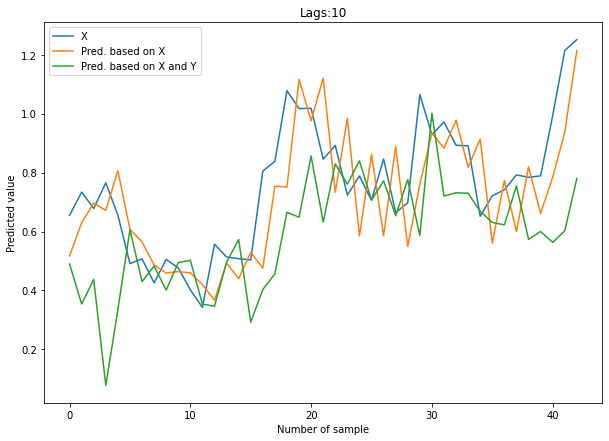

Statistics value = 2.0 p-value = 0.999999675760713


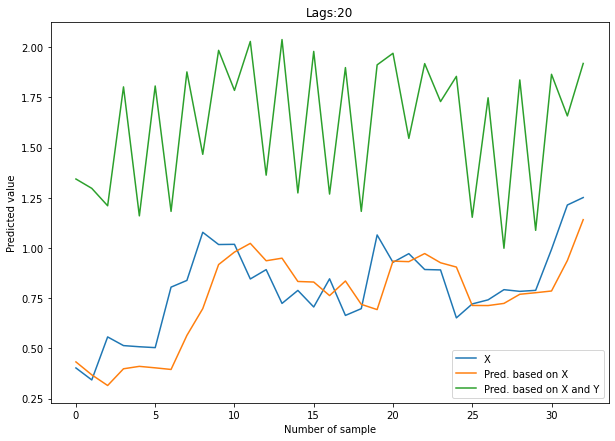

Statistics value = 76.0 p-value = 0.970334130511186


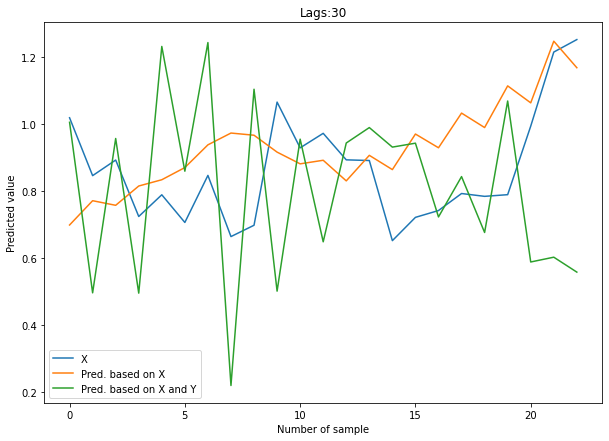

In [ ]:
results = nlc.nonlincausalityGRU(x=np.array(df_train), maxlag=lags, GRU_layers=2, GRU_neurons=[25, 25], Dense_layers=2, Dense_neurons=[100, 100], x_test=np.array(df_test), run=3, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
# nlc.nonlincausalityGRU(x=np.array(df_train),
#     maxlag=lags,
#     LSTM_layers=2,
#     LSTM_neurons=[25, 25],
#     Dense_layers=2,
#     Dense_neurons=[100, 100],
#     x_test=np.array(df_test),
#     run=3,
#     add_Dropout=True,
#     Dropout_rate=0.01,
#     epochs_num=[50, 100],
#     learning_rate=[0.001, 0.0001],
#     batch_size_num=128,
#     verbose=False,
#     plot=True)

For lag = 10 Cohen's d = 0.120
test statistic = 0.8840385690339629 p-value = 0.8840385690339629
For lag = 20 Cohen's d = 0.299
test statistic = 0.9664834833986883 p-value = 0.9664834833986883
For lag = 30 Cohen's d = 0.182
test statistic = 0.8027871187738191 p-value = 0.8027871187738191


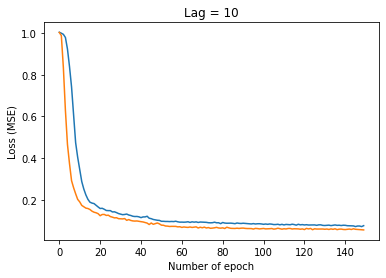

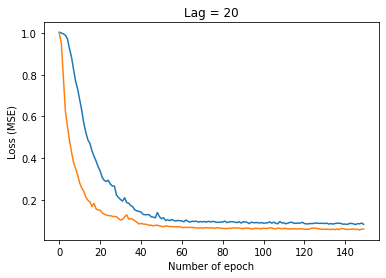

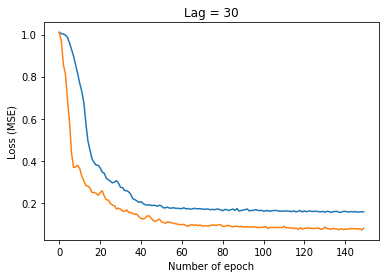

In [ ]:
import matplotlib.pyplot as plt
for lag in lags:
    best_model_X_lag = results[lag].best_model_X
    best_model_XY_lag = results[lag].best_model_XY

    p_value = results[lag].p_value
    test_statistic = results[lag].test_statistic

    best_history_X = results[lag].best_history_X
    best_history_XY = results[lag].best_history_XY

    nlc.plot_history_loss(best_history_X, best_history_XY)
    plt.title("Lag = %d" % lag)

    best_errors_X = results[lag].best_errors_X
    best_errors_XY = results[lag].best_errors_XY

    cohens_d = np.abs(
        (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
        / np.std([best_errors_X, best_errors_XY])
    )
    print("For lag = %d Cohen's d = %0.3f" % (lag, cohens_d))
    print(f"test statistic = {test_statistic} p-value = {p_value}")

0->1
Epoch 1/50
6/6 [==============================] - 1s 13ms/step - loss: 0.8571 - mse: 0.8571
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4249 - mse: 0.4249
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.1672 - mse: 0.1672
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1008 - mse: 0.1008
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1173 - mse: 0.1173
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0921 - mse: 0.0921
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0795 - mse: 0.0795
Epoch 8/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0785 - mse: 0.0785
Epoch 9/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0723 - mse: 0.0723
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0695 - mse: 0.0695
Epoch 11/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0656

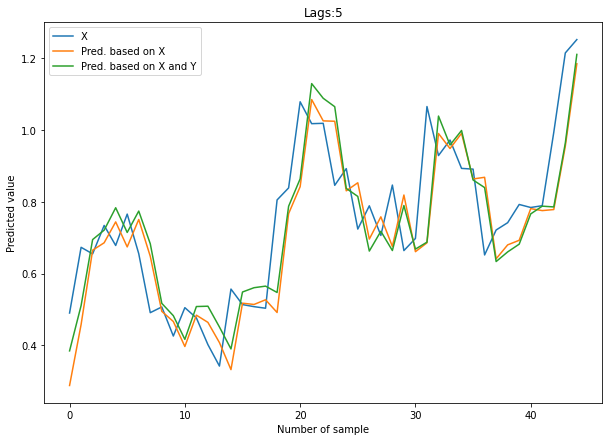

Epoch 1/50
6/6 [==============================] - 1s 9ms/step - loss: 0.8179 - mse: 0.8179
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3404 - mse: 0.3404
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1793 - mse: 0.1793
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2098 - mse: 0.2098
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1594 - mse: 0.1594
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1384 - mse: 0.1384
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1316 - mse: 0.1316
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1164 - mse: 0.1164
Epoch 9/50
6/6 [==============================] - 0s 9ms/step - loss: 0.1060 - mse: 0.1060
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.0939 - mse: 0.0939
Epoch 11/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0836 - mse: 0

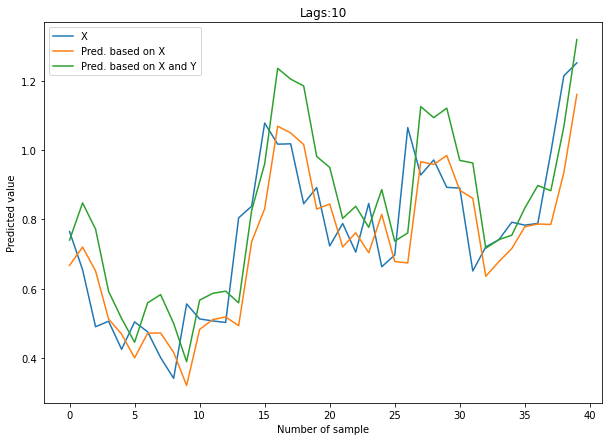

Epoch 1/50
6/6 [==============================] - 1s 14ms/step - loss: 0.8362 - mse: 0.8362
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.3622 - mse: 0.3622
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2920 - mse: 0.2920
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2545 - mse: 0.2545
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2031 - mse: 0.2031
Epoch 6/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1776 - mse: 0.1776
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1400 - mse: 0.1400
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1186 - mse: 0.1186
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0986 - mse: 0.0986
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0913 - mse: 0.0913
Epoch 11/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0839 

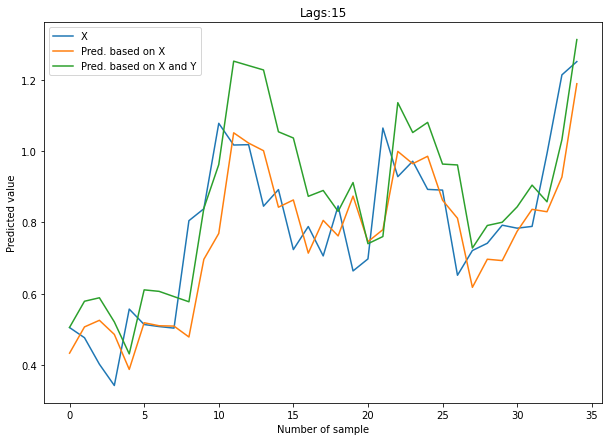

Epoch 1/50
6/6 [==============================] - 1s 36ms/step - loss: 0.8529 - mse: 0.8529
Epoch 2/50
6/6 [==============================] - 0s 33ms/step - loss: 0.3833 - mse: 0.3833
Epoch 3/50
6/6 [==============================] - 0s 35ms/step - loss: 0.3198 - mse: 0.3198
Epoch 4/50
6/6 [==============================] - 0s 46ms/step - loss: 0.2284 - mse: 0.2284
Epoch 5/50
6/6 [==============================] - 0s 34ms/step - loss: 0.1732 - mse: 0.1732
Epoch 6/50
6/6 [==============================] - 0s 28ms/step - loss: 0.1259 - mse: 0.1259
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 0.1086 - mse: 0.1086
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.1014 - mse: 0.1014
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0980 - mse: 0.0980
Epoch 10/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0880 - mse: 0.0880
Epoch 11/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0816 

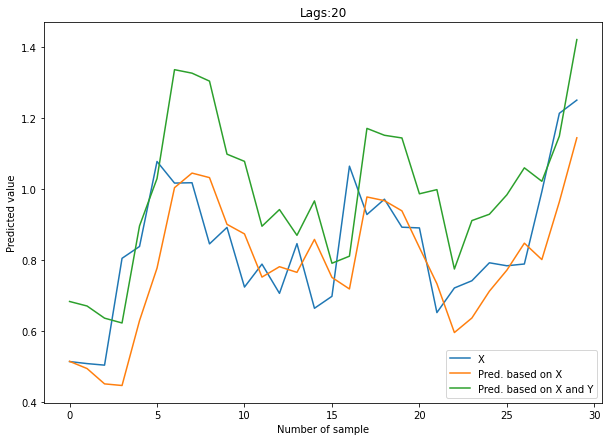

Epoch 1/50
6/6 [==============================] - 1s 19ms/step - loss: 0.7525 - mse: 0.7525
Epoch 2/50
6/6 [==============================] - 0s 18ms/step - loss: 0.3643 - mse: 0.3643
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.2762 - mse: 0.2762
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1975 - mse: 0.1975
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.1517 - mse: 0.1517
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 0.1240 - mse: 0.1240
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1146 - mse: 0.1146
Epoch 8/50
6/6 [==============================] - 0s 19ms/step - loss: 0.1014 - mse: 0.1014
Epoch 9/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0921 - mse: 0.0921
Epoch 10/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0870 - mse: 0.0870
Epoch 11/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0784 

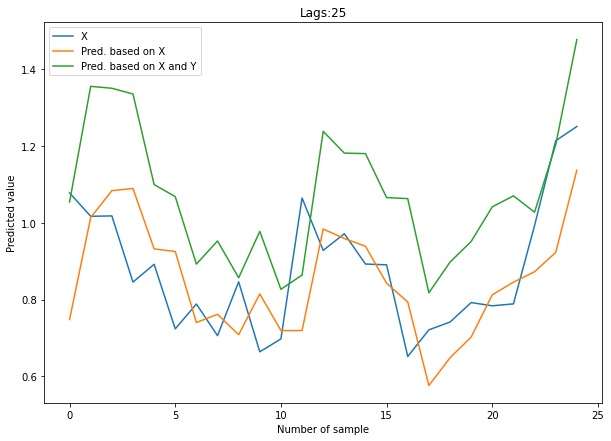

1->0
Epoch 1/50
6/6 [==============================] - 1s 7ms/step - loss: 0.5086 - mse: 0.5086
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1613 - mse: 0.1613
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0161 - mse: 0.0161
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0329 - mse: 0.0329
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0205 - mse: 0.0205
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0070 - mse: 0.0070
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0084 - mse: 0.0084
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.0067 - mse: 0.0067
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0048 - mse: 0.0048
Epoch 11/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0043 - mse

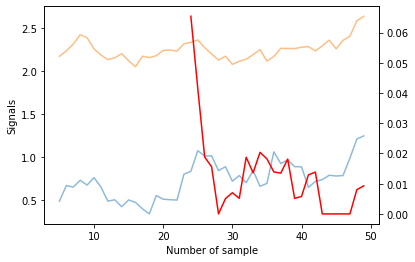

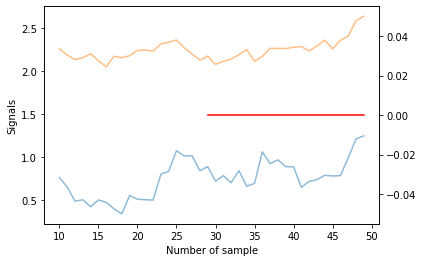

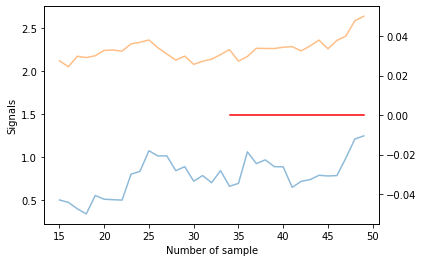

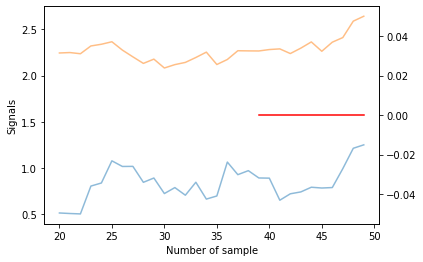

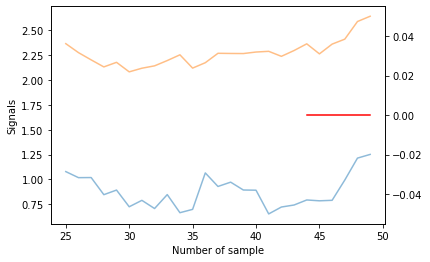

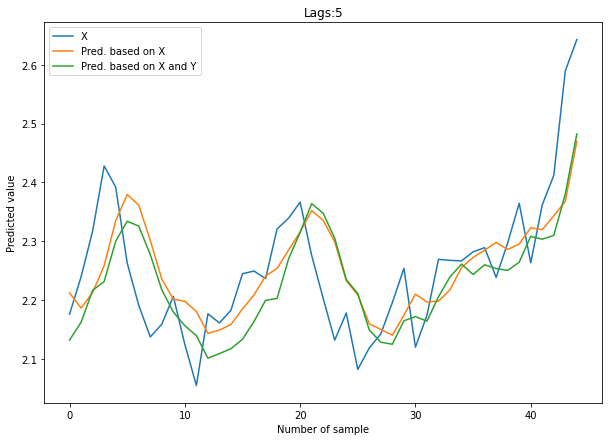

Epoch 1/50
6/6 [==============================] - 1s 16ms/step - loss: 0.5144 - mse: 0.5144
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1040 - mse: 0.1040
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0258 - mse: 0.0258
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0439 - mse: 0.0439
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0112 - mse: 0.0112
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0175 - mse: 0.0175
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0100 - mse: 0.0100
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0086 - mse: 0.0086
Epoch 9/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0081 - mse: 0.0081
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0075 - mse: 0.0075
Epoch 11/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0073 

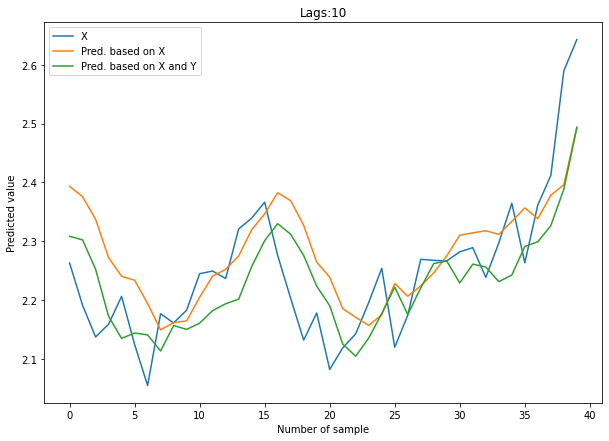

Epoch 1/50
6/6 [==============================] - 1s 14ms/step - loss: 0.4894 - mse: 0.4894
Epoch 2/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0540 - mse: 0.0540
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0597 - mse: 0.0597
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0211 - mse: 0.0211
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0170 - mse: 0.0170
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0160 - mse: 0.0160
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0098 - mse: 0.0098
Epoch 8/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0108 - mse: 0.0108
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0093 - mse: 0.0093
Epoch 10/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0088 - mse: 0.0088
Epoch 11/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0085 

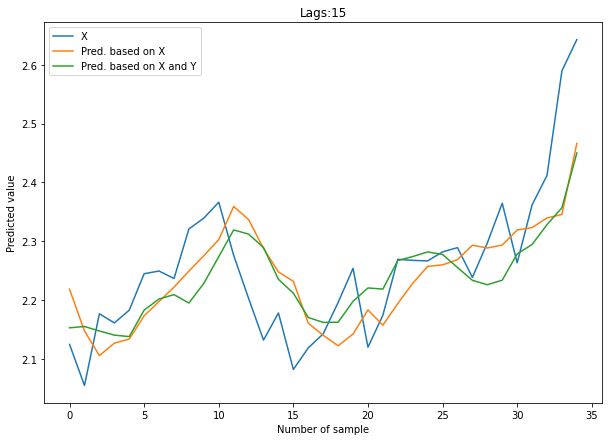

Epoch 1/50
6/6 [==============================] - 1s 20ms/step - loss: 0.4824 - mse: 0.4824
Epoch 2/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0613 - mse: 0.0613
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0701 - mse: 0.0701
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0217 - mse: 0.0217
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0258 - mse: 0.0258
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.0171 - mse: 0.0171
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0144 - mse: 0.0144
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0140 - mse: 0.0140
Epoch 9/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0121 - mse: 0.0121
Epoch 10/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0118 - mse: 0.0118
Epoch 11/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0118 

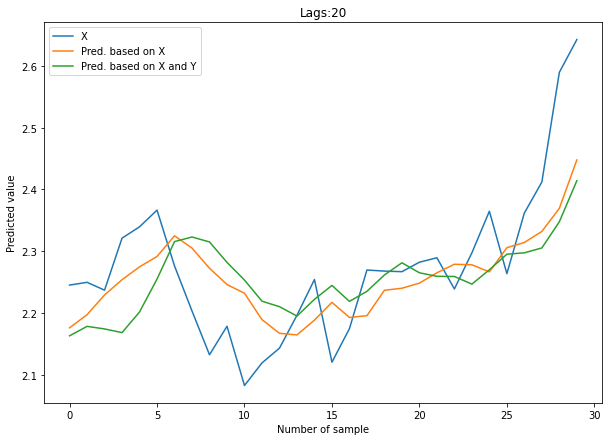

Epoch 1/50
6/6 [==============================] - 1s 24ms/step - loss: 0.4497 - mse: 0.4497
Epoch 2/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0410 - mse: 0.0410
Epoch 3/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0698 - mse: 0.0698
Epoch 4/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0247 - mse: 0.0247
Epoch 5/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0308 - mse: 0.0308
Epoch 6/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0191 - mse: 0.0191
Epoch 7/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0196 - mse: 0.0196
Epoch 8/50
6/6 [==============================] - 0s 20ms/step - loss: 0.0156 - mse: 0.0156
Epoch 9/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0151 - mse: 0.0151
Epoch 10/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0138 - mse: 0.0138
Epoch 11/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0133 

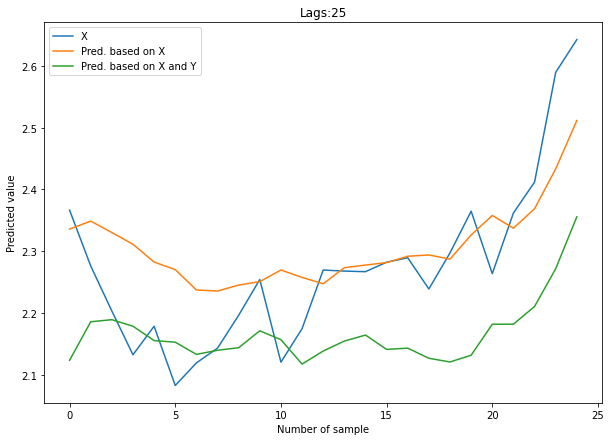

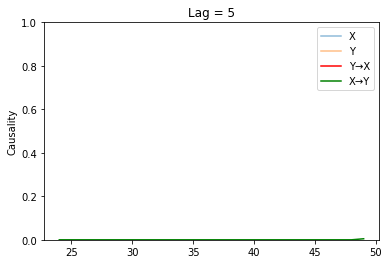

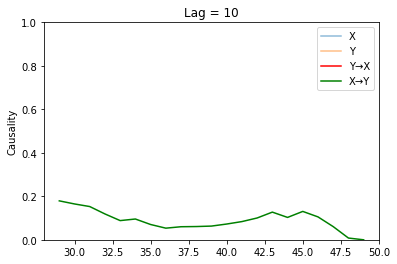

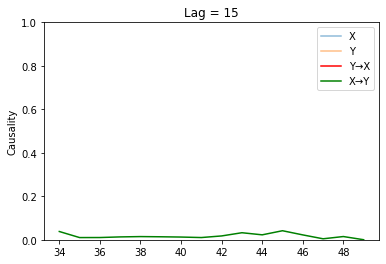

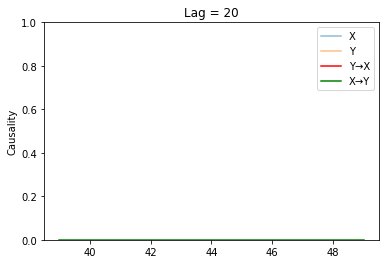

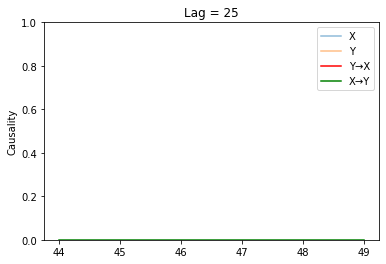

In [ ]:
results = nlc.nonlincausalitymeasureMLP(x=np.array(df_train), maxlag=lags,window=20,step=1, Dense_layers=2, Dense_neurons=[100, 100], x_test=np.array(df_test), run=1, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=True, plot=True)

In [ ]:
results['0->1'][2]

{5: <nonlincausality.results.ResultsNonlincausality at 0x7fb8bd7dd410>,
 10: <nonlincausality.results.ResultsNonlincausality at 0x7fb8baa02a90>,
 15: <nonlincausality.results.ResultsNonlincausality at 0x7fb8f4f5f990>,
 20: <nonlincausality.results.ResultsNonlincausality at 0x7fb8d36f6550>,
 25: <nonlincausality.results.ResultsNonlincausality at 0x7fb8ba9aa650>}

For lag = 5 Cohen's d = 0.010
test statistic = 0.7040755647045317 p-value = 0.7040755647045317
For lag = 10 Cohen's d = 0.209
test statistic = 0.9825830356651493 p-value = 0.9825830356651493
For lag = 15 Cohen's d = 0.225
test statistic = 0.9667074275134435 p-value = 0.9667074275134435
For lag = 20 Cohen's d = 0.442
test statistic = 0.9930127179398709 p-value = 0.9930127179398709
For lag = 25 Cohen's d = 0.530
test statistic = 0.9925556589106964 p-value = 0.9925556589106964


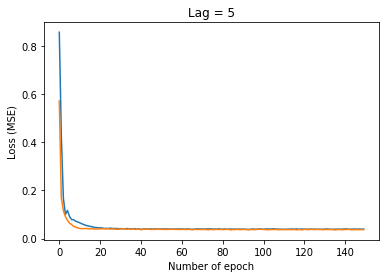

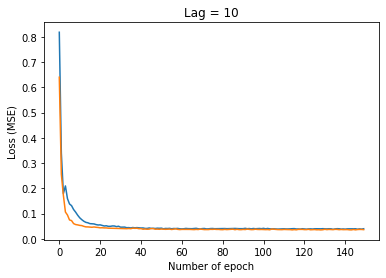

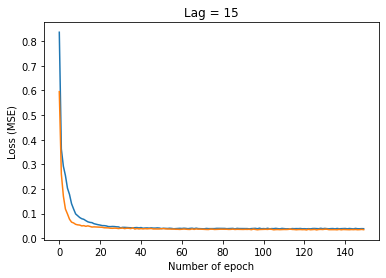

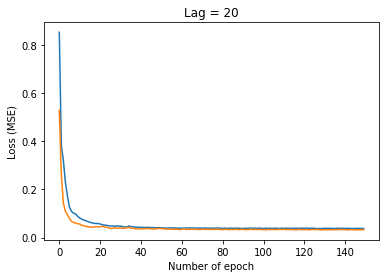

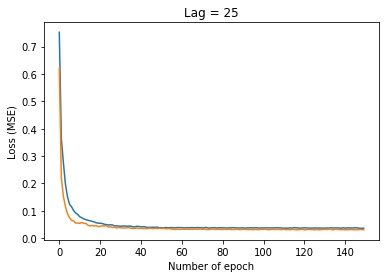

In [ ]:
import matplotlib.pyplot as plt
results=results['0->1'][2]
for lag in lags:
    best_model_X_lag = results[lag].best_model_X
    best_model_XY_lag = results[lag].best_model_XY

    p_value = results[lag].p_value
    test_statistic = results[lag].test_statistic

    best_history_X = results[lag].best_history_X
    best_history_XY = results[lag].best_history_XY

    nlc.plot_history_loss(best_history_X, best_history_XY)
    plt.title("Lag = %d" % lag)

    best_errors_X = results[lag].best_errors_X
    best_errors_XY = results[lag].best_errors_XY

    cohens_d = np.abs(
        (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
        / np.std([best_errors_X, best_errors_XY])
    )
    print("For lag = %d Cohen's d = %0.3f" % (lag, cohens_d))
    print(f"test statistic = {test_statistic} p-value = {p_value}")

0->1
Epoch 1/50
6/6 [==============================] - 6s 13ms/step - loss: 0.8507 - mse: 0.8507
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.5254 - mse: 0.5254
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3106 - mse: 0.3106
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.2312 - mse: 0.2312
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.2098 - mse: 0.2098
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2039 - mse: 0.2039
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1854 - mse: 0.1854
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 0.1837 - mse: 0.1837
Epoch 9/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1698 - mse: 0.1698
Epoch 10/50
6/6 [==============================] - 0s 12ms/step - loss: 0.1634 - mse: 0.1634
Epoch 11/50
6/6 [==============================] - 0s 13ms/step - loss: 0.

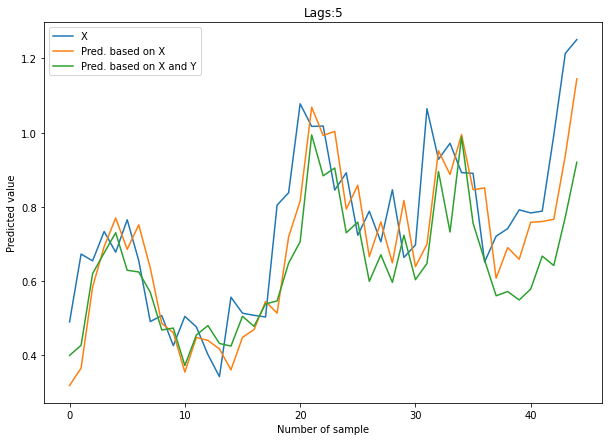

Epoch 1/50
6/6 [==============================] - 3s 18ms/step - loss: 0.8594 - mse: 0.8594
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 0.5867 - mse: 0.5867
Epoch 3/50
6/6 [==============================] - 0s 18ms/step - loss: 0.4196 - mse: 0.4196
Epoch 4/50
6/6 [==============================] - 0s 18ms/step - loss: 0.4049 - mse: 0.4049
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 0.3954 - mse: 0.3954
Epoch 6/50
6/6 [==============================] - 0s 19ms/step - loss: 0.3797 - mse: 0.3797
Epoch 7/50
6/6 [==============================] - 0s 18ms/step - loss: 0.3737 - mse: 0.3737
Epoch 8/50
6/6 [==============================] - 0s 19ms/step - loss: 0.3626 - mse: 0.3626
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 0.3514 - mse: 0.3514
Epoch 10/50
6/6 [==============================] - 0s 21ms/step - loss: 0.3357 - mse: 0.3357
Epoch 11/50
6/6 [==============================] - 0s 18ms/step - loss: 0.3128 

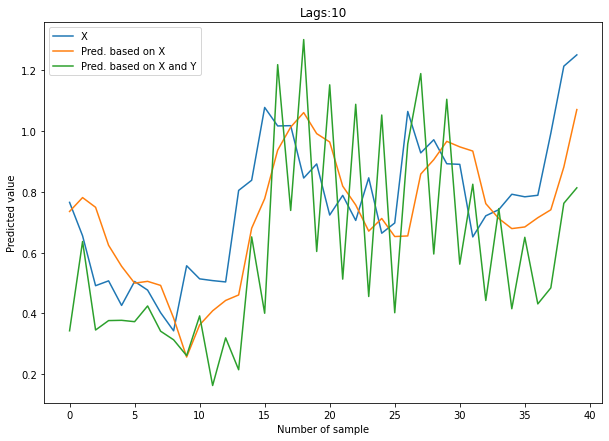

Epoch 1/50
6/6 [==============================] - 3s 29ms/step - loss: 0.8861 - mse: 0.8861
Epoch 2/50
6/6 [==============================] - 0s 26ms/step - loss: 0.6668 - mse: 0.6668
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5784 - mse: 0.5784
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.5826 - mse: 0.5826
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5636 - mse: 0.5636
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5577 - mse: 0.5577
Epoch 7/50
6/6 [==============================] - 0s 30ms/step - loss: 0.5510 - mse: 0.5510
Epoch 8/50
6/6 [==============================] - 0s 24ms/step - loss: 0.5414 - mse: 0.5414
Epoch 9/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5331 - mse: 0.5331
Epoch 10/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5178 - mse: 0.5178
Epoch 11/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5025 

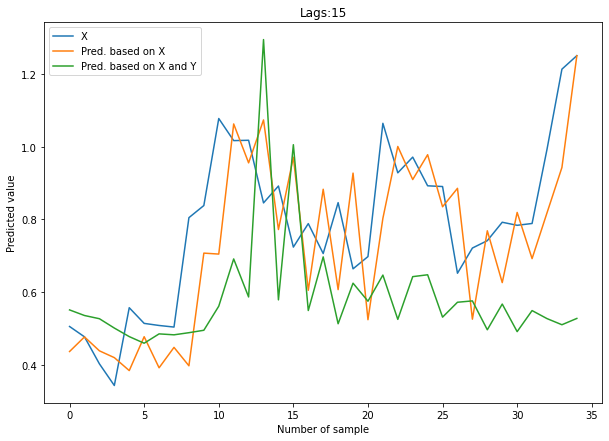

Epoch 1/50
6/6 [==============================] - 3s 31ms/step - loss: 0.9429 - mse: 0.9429
Epoch 2/50
6/6 [==============================] - 0s 33ms/step - loss: 0.7813 - mse: 0.7813
Epoch 3/50
6/6 [==============================] - 0s 33ms/step - loss: 0.7045 - mse: 0.7045
Epoch 4/50
6/6 [==============================] - 0s 33ms/step - loss: 0.7169 - mse: 0.7169
Epoch 5/50
6/6 [==============================] - 0s 33ms/step - loss: 0.7011 - mse: 0.7011
Epoch 6/50
6/6 [==============================] - 0s 32ms/step - loss: 0.6910 - mse: 0.6910
Epoch 7/50
6/6 [==============================] - 0s 36ms/step - loss: 0.6899 - mse: 0.6899
Epoch 8/50
6/6 [==============================] - 0s 33ms/step - loss: 0.6820 - mse: 0.6820
Epoch 9/50
6/6 [==============================] - 0s 31ms/step - loss: 0.6705 - mse: 0.6705
Epoch 10/50
6/6 [==============================] - 0s 34ms/step - loss: 0.6559 - mse: 0.6559
Epoch 11/50
6/6 [==============================] - 0s 31ms/step - loss: 0.6361 

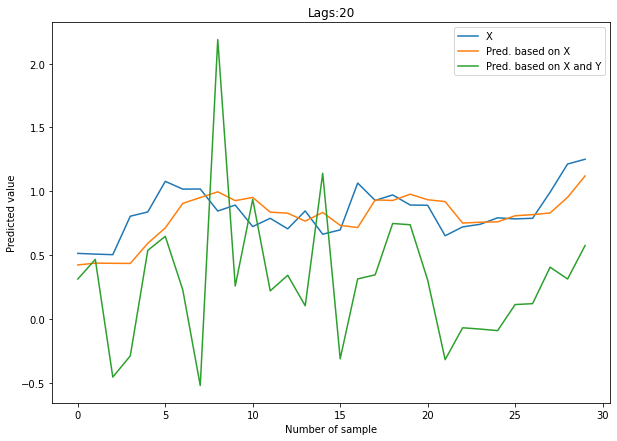

Epoch 1/50
6/6 [==============================] - 3s 37ms/step - loss: 0.9716 - mse: 0.9716
Epoch 2/50
6/6 [==============================] - 0s 37ms/step - loss: 0.8645 - mse: 0.8645
Epoch 3/50
6/6 [==============================] - 0s 39ms/step - loss: 0.8174 - mse: 0.8174
Epoch 4/50
6/6 [==============================] - 0s 40ms/step - loss: 0.8255 - mse: 0.8255
Epoch 5/50
6/6 [==============================] - 0s 40ms/step - loss: 0.8176 - mse: 0.8176
Epoch 6/50
6/6 [==============================] - 0s 36ms/step - loss: 0.8121 - mse: 0.8121
Epoch 7/50
6/6 [==============================] - 0s 41ms/step - loss: 0.8121 - mse: 0.8121
Epoch 8/50
6/6 [==============================] - 0s 38ms/step - loss: 0.8068 - mse: 0.8068
Epoch 9/50
6/6 [==============================] - 0s 36ms/step - loss: 0.8006 - mse: 0.8006
Epoch 10/50
6/6 [==============================] - 0s 37ms/step - loss: 0.7894 - mse: 0.7894
Epoch 11/50
6/6 [==============================] - 0s 39ms/step - loss: 0.7827 

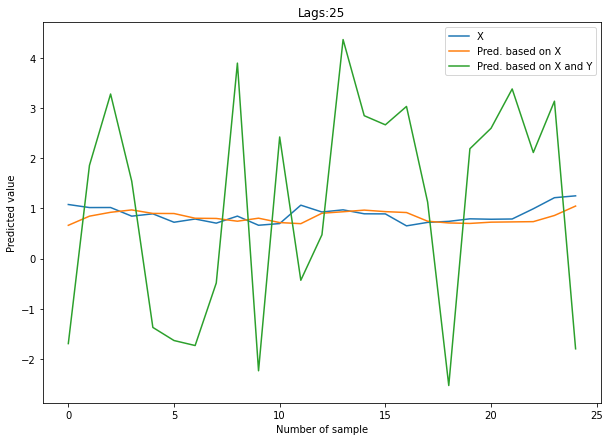

1->0
Epoch 1/50
6/6 [==============================] - 3s 14ms/step - loss: 0.6203 - mse: 0.6203
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.3852 - mse: 0.3852
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: 0.1585 - mse: 0.1585
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0387 - mse: 0.0387
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0424 - mse: 0.0424
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0171 - mse: 0.0171
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0166 - mse: 0.0166
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0163 - mse: 0.0163
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0110 - mse: 0.0110
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0115 - mse: 0.0115
Epoch 11/50
6/6 [==============================] - 0s 14ms/step - loss: 0.

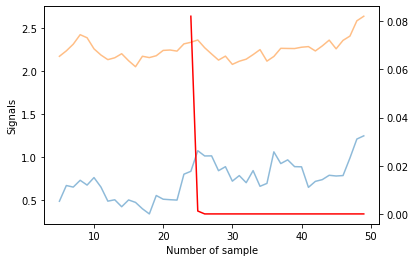

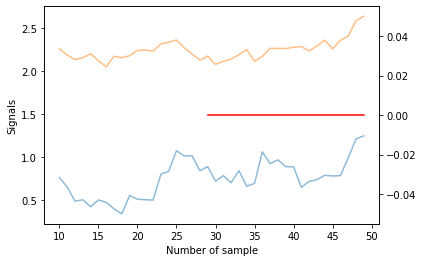

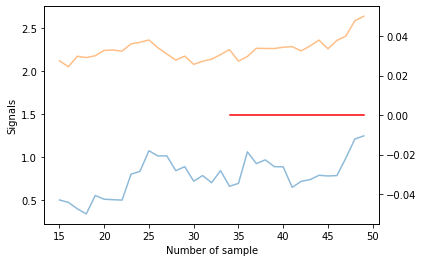

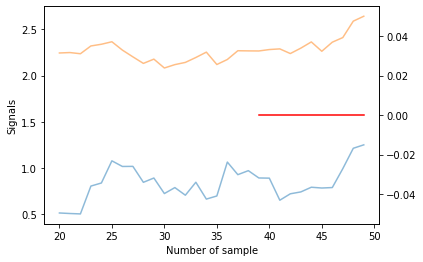

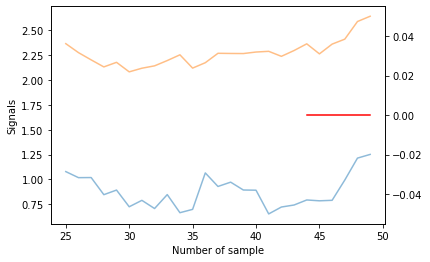

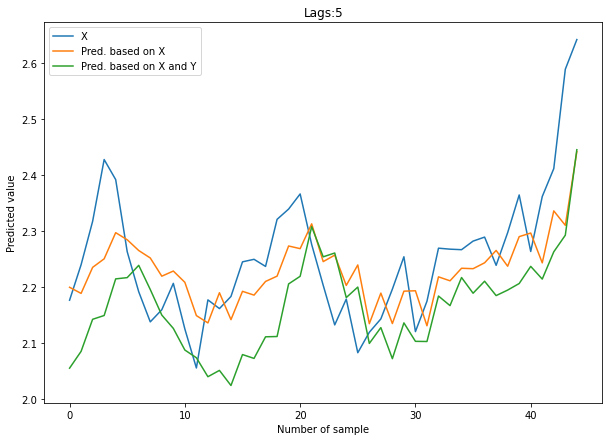

Epoch 1/50
6/6 [==============================] - 3s 20ms/step - loss: 0.5939 - mse: 0.5939
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 0.2871 - mse: 0.2871
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.1117 - mse: 0.1117
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0307 - mse: 0.0307
Epoch 5/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0466 - mse: 0.0466
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0228 - mse: 0.0228
Epoch 7/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0236 - mse: 0.0236
Epoch 8/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0230 - mse: 0.0230
Epoch 9/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0192 - mse: 0.0192
Epoch 10/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0198 - mse: 0.0198
Epoch 11/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0183 

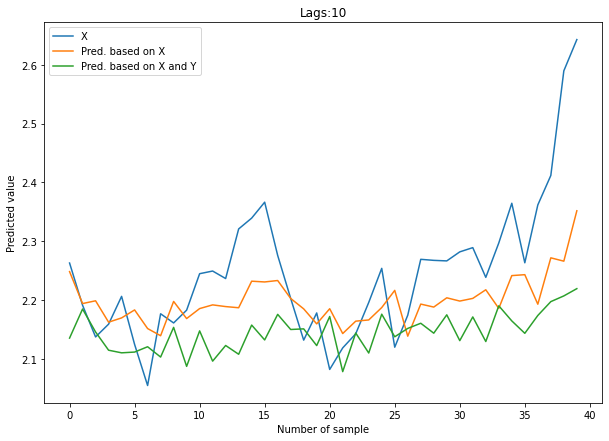

Epoch 1/50
6/6 [==============================] - 3s 28ms/step - loss: 0.6051 - mse: 0.6051
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 0.3719 - mse: 0.3719
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 0.1539 - mse: 0.1539
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0409 - mse: 0.0409
Epoch 5/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0596 - mse: 0.0596
Epoch 6/50
6/6 [==============================] - 0s 26ms/step - loss: 0.0314 - mse: 0.0314
Epoch 7/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0360 - mse: 0.0360
Epoch 8/50
6/6 [==============================] - 0s 29ms/step - loss: 0.0323 - mse: 0.0323
Epoch 9/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0277 - mse: 0.0277
Epoch 10/50
6/6 [==============================] - 0s 28ms/step - loss: 0.0294 - mse: 0.0294
Epoch 11/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0265 

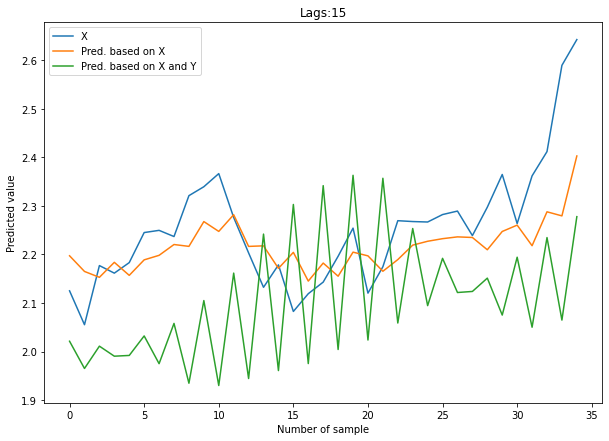

Epoch 1/50
6/6 [==============================] - 4s 39ms/step - loss: 0.6134 - mse: 0.6134
Epoch 2/50
6/6 [==============================] - 0s 37ms/step - loss: 0.3674 - mse: 0.3674
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 0.1645 - mse: 0.1645
Epoch 4/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0553 - mse: 0.0553
Epoch 5/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0579 - mse: 0.0579
Epoch 6/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0424 - mse: 0.0424
Epoch 7/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0396 - mse: 0.0396
Epoch 8/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0401 - mse: 0.0401
Epoch 9/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0361 - mse: 0.0361
Epoch 10/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0351 - mse: 0.0351
Epoch 11/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0346 

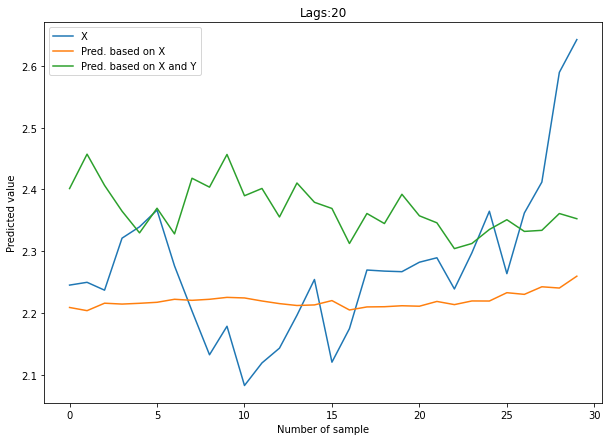

Epoch 1/50
6/6 [==============================] - 3s 46ms/step - loss: 0.5929 - mse: 0.5929
Epoch 2/50
6/6 [==============================] - 0s 43ms/step - loss: 0.3282 - mse: 0.3282
Epoch 3/50
6/6 [==============================] - 0s 38ms/step - loss: 0.1114 - mse: 0.1114
Epoch 4/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0650 - mse: 0.0650
Epoch 5/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0643 - mse: 0.0643
Epoch 6/50
6/6 [==============================] - 0s 47ms/step - loss: 0.0450 - mse: 0.0450
Epoch 7/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0488 - mse: 0.0488
Epoch 8/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0440 - mse: 0.0440
Epoch 9/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0428 - mse: 0.0428
Epoch 10/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0433 - mse: 0.0433
Epoch 11/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0392 

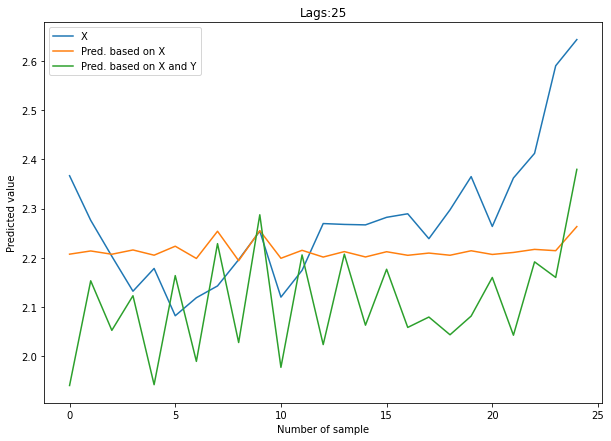

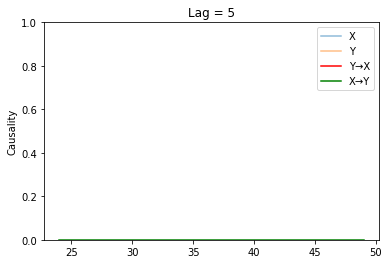

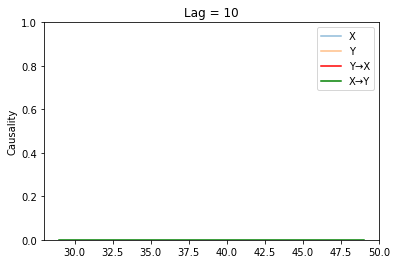

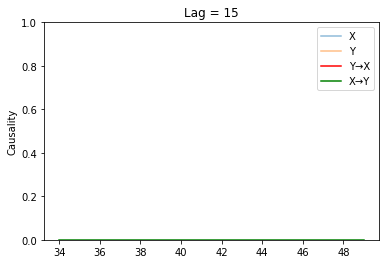

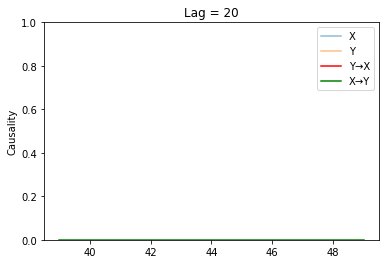

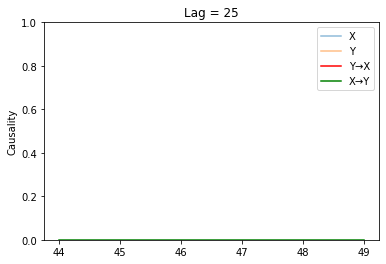

In [ ]:
results = nlc.nonlincausalitymeasureGRU(x=np.array(df_train),GRU_layers=2, GRU_neurons=[25, 25], maxlag=lags,window=20,step=1, Dense_layers=2, Dense_neurons=[100, 100], x_test=np.array(df_test), run=1, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=True, plot=True)

In [ ]:
results

{5: <nonlincausality.results.ResultsNonlincausality at 0x7fb8b6177310>,
 10: <nonlincausality.results.ResultsNonlincausality at 0x7fb8cb8fdb10>,
 15: <nonlincausality.results.ResultsNonlincausality at 0x7fb8c846aad0>,
 20: <nonlincausality.results.ResultsNonlincausality at 0x7fb8c47efed0>,
 25: <nonlincausality.results.ResultsNonlincausality at 0x7fb8c47f4810>}

In [ ]:
import matplotlib.pyplot as plt
results=results['1->0'][2]
for lag in lags:
    best_model_X_lag = results[lag].best_model_X
    best_model_XY_lag = results[lag].best_model_XY

    p_value = results[lag].p_value
    test_statistic = results[lag].test_statistic

    best_history_X = results[lag].best_history_X
    best_history_XY = results[lag].best_history_XY

    nlc.plot_history_loss(best_history_X, best_history_XY)
    plt.title("Lag = %d" % lag)

    best_errors_X = results[lag].best_errors_X
    best_errors_XY = results[lag].best_errors_XY

    cohens_d = np.abs(
        (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
        / np.std([best_errors_X, best_errors_XY])
    )
    print("For lag = %d Cohen's d = %0.3f" % (lag, cohens_d))
    print(f"test statistic = {test_statistic} p-value = {p_value}")

KeyError: ignored

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df=dataframe_scaler(sentiment_all_exch_rate_all_indices_Df,'Min-max')

Min-max


In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df[['FRANCE_INDEX_Price','GERMAN_INDEX_Price','UK_INDEX_Price','USA_INDEX_Price','JAPAN_INDEX_Price','Nifty_Price']].to_csv('data/only_global_indices.csv')

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df[['FRANCE_INDEX_Price','GERMAN_INDEX_Price','UK_INDEX_Price','USA_INDEX_Price','JAPAN_INDEX_Price','Nifty_Price']]

FRANCE_INDEX_Price  GERMAN_INDEX_Price  UK_INDEX_Price  USA_INDEX_Price  \
0              0.954278            0.752305        0.795942         0.989602   
1              0.957620            0.726539        0.789419         1.000000   
2              0.929180            0.706208        0.750699         0.966678   
3              0.892435            0.673093        0.714889         0.947022   
4              0.891036            0.659116        0.714014         0.909541   
..                  ...                 ...             ...              ...   
748            0.197835            0.183246        0.900909         0.045155   
749            0.192339            0.192859        0.898541         0.041689   
750            0.190324            0.241461        0.882785         0.038966   
751            0.197245            0.260889        0.865803         0.040749   
752            0.188123            0.264485        0.997756         0.040154   

     JAPAN_INDEX_Price  Nifty_Price  
0             0.803345     1.000000  
1             0.809483     0.986020  
2             0.793395     0.939239  
3             0.792408     0.926066  
4             0.761219     0.900203  
..                 ...          ...  
748           0.275191     0.033465  
749           0.291914     0.033607  
750           0.294030     0.031846  
751           0.296571     0.022244  
752           0.294736     0.016520  

[753 rows x 6 columns]

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FRANCE_INDEX_Price        753 non-null    float64
 1   GERMAN_INDEX_Price        753 non-null    float64
 2   UK_INDEX_Price            753 non-null    float64
 3   USA_INDEX_Price           753 non-null    float64
 4   JAPAN_INDEX_Price         753 non-null    float64
 5   EUR_INR_Price             753 non-null    float64
 6   JPY_INR_Price             753 non-null    float64
 7   GBP_INR_Price             753 non-null    float64
 8   Unnamed: 0.1              753 non-null    float64
 9   CARDINAL_MoneyControl     753 non-null    float64
 10  DATE_MoneyControl         753 non-null    float64
 11  EVENT_MoneyControl        753 non-null    float64
 12  FAC_MoneyControl          753 non-null    float64
 13  GPE_MoneyControl          753 non-null    float64
 14  LANGUAGE_M

In [ ]:
sentiment_all_exch_rate_normal_Df=dataframe_scaler(sentiment_all_exch_rate_Df,'standard')

standard
apply standardization


In [ ]:
sentiment_all_exch_rate_normal_Df

EUR_INR_Price  JPY_INR_Price  GBP_INR_Price  Unnamed: 0.1  \
841      -1.616571      -2.730668      -1.674745     -1.737845   
840      -1.604994      -2.757135      -1.628175     -1.734914   
839      -1.660416      -2.798304      -1.705791     -1.731982   
838      -1.685911      -2.910050      -1.681342     -1.729051   
837      -1.744412      -2.883584      -1.648937     -1.720258   
..             ...            ...            ...           ...   
4         0.580981       0.148256       1.121950      1.718037   
3         0.587632       0.048273       1.178998      1.720968   
2         0.457575      -0.175218       1.188506      1.726830   
1         0.386388      -0.304608       1.152220      1.729761   
0         0.294017      -0.363422       1.120398      1.732693   

     CARDINAL_MoneyControl  DATE_MoneyControl  EVENT_MoneyControl  \
841               0.879010           1.078796            0.128346   
840               0.166665           0.060672           -0.379013   
839               0.641562           1.078796           -0.379013   
838               0.641562           1.318355            0.128346   
837               0.166665           0.839237           -0.379013   
..                     ...                ...                 ...   
4                 0.879010          -0.598114           -0.379013   
3                -1.020577          -0.418445           -0.379013   
2                 0.641562          -0.358555            0.635706   
1                -0.545680          -0.118997            0.635706   
0                -1.020577          -0.538224           -0.379013   

     FAC_MoneyControl  GPE_MoneyControl  LANGUAGE_MoneyControl  ...  \
841          1.447310          0.315665              -0.115227  ...   
840         -0.374267         -0.340282              -0.115227  ...   
839          3.268888          4.776103              -0.115227  ...   
838          3.268888         -0.077903              -0.115227  ...   
837          3.268888          1.102801              -0.115227  ...   
..                ...               ...                    ...  ...   
4           -0.374267         -0.077903              -0.115227  ...   
3           -0.374267         -0.209093              -0.115227  ...   
2           -0.374267         -1.258608              -0.115227  ...   
1           -0.374267         -1.389797              -0.115227  ...   
0           -0.374267         -0.340282              -0.115227  ...   

     QUANTITY_TheHindu  TIME_TheHindu  WORK_OF_ART_TheHindu  \
841          -0.168564      -0.116388             -0.155421   
840           3.566459      -0.116388             -0.155421   
839          -0.168564      -0.116388             -0.155421   
838          -0.168564      -0.116388             -0.155421   
837          -0.168564      -0.116388             -0.155421   
..                 ...            ...                   ...   
4            -0.168564      -0.116388             -0.155421   
3            -0.168564      -0.116388             -0.155421   
2            -0.168564      -0.116388             -0.155421   
1            -0.168564      -0.116388             -0.155421   
0            -0.168564      -0.116388             -0.155421   

     POSITIVE_MoneyControl  NEGATIVE_MoneyControl  POSITIVE_TheHindu  \
841               1.202717               0.387851           0.810573   
840               0.692954               0.209731           1.563188   
839               0.203399               1.377316          -0.235827   
838               0.105891               2.229447          -0.787039   
837               0.185277               1.093404           0.001954   
..                     ...                    ...                ...   
4                -0.352540              -0.389816          -0.787039   
3                -0.182519              -1.146528          -0.787039   
2                -0.411113              -0.872690           1.691061   
1                -0.235261              -0.439968    

In [ ]:
sentiment_all_exch_rate_normal_Df[['FRANCE_INDEX_Price','GERMAN_INDEX_Price','UK_INDEX_Price','USA_INDEX_Price','JAPAN_INDEX_Price','Nifty_Price']]

KeyError: ignored

##### Causality using TCDF

In [ ]:
cd /content/gdrive/MyDrive/DBA/TCDF

/content/gdrive/MyDrive/DBA/TCDF


Arguments: Namespace(cuda=False, data=['/content/gdrive/MyDrive/DBA/data/only_global_indices.csv'], dilation_coefficient=4, epochs=2000, ground_truth=None, hidden_layers=5, kernel_size=4, learning_rate=0.01, log_interval=250, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  only_global_indices.csv

 Analysis started for target:  Unnamed: 0
Epoch:  1 [0%] 	Loss: 188610.171875
Epoch: 250 [12%] 	Loss: 117.417725
Epoch: 500 [25%] 	Loss: 63.291191
Epoch: 750 [38%] 	Loss: 21.294502
Epoch: 1000 [50%] 	Loss: 11.135414
Epoch: 1250 [62%] 	Loss: 7.797443
Epoch: 1500 [75%] 	Loss: 5.719815
Epoch: 1750 [88%] 	Loss: 4.501018
Epoch: 2000 [100%] 	Loss: 3.679339
Potential causes:  [0]
Validated causes:  []

 Analysis started for target:  FRANCE_INDEX_Price
Epoch:  1 [0%] 	Loss: 0.999063
Epoch: 250 [12%] 	Loss: 0.006527
Epoch: 500 [25%] 	Loss: 0.005816
Epoch: 750 [38%] 	Loss: 0.002725
Epoch: 1000 [50%] 	Loss: 0.002442
Epoch: 1250 [62%] 	Loss: 0.002137
Epoch: 1500 [75%] 	Loss: 0.00195

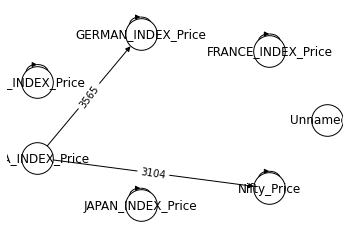

<Figure size 432x288 with 0 Axes>

In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --plot  --hidden_layers 5 --epochs 2000 --log_interval 250  --data /content/gdrive/MyDrive/DBA/data/only_global_indices.csv

In [ ]:
sentiment_all_exch_rate_normal_Df[['EUR_INR_Price','USD_INR_Price','JPY_INR_Price','GBP_INR_Price','Nifty_Price']]

EUR_INR_Price  USD_INR_Price  JPY_INR_Price  GBP_INR_Price  Nifty_Price
841      -1.616571      -2.578097      -2.730668      -1.674745    -1.094639
840      -1.604994      -2.648471      -2.757135      -1.628175    -1.089553
839      -1.660416      -2.634076      -2.798304      -1.705791    -1.091728
838      -1.685911      -2.686857      -2.910050      -1.681342    -1.085218
837      -1.744412      -2.643673      -2.883584      -1.648937    -1.065306
..             ...            ...            ...            ...          ...
4         0.580981       1.268474       0.148256       1.121950     2.387717
3         0.587632       1.190103       0.048273       1.178998     2.438018
2         0.457575       1.036560      -0.175218       1.188506     2.576880
1         0.386388       0.905409      -0.304608       1.152220     2.616642
0         0.294017       0.855827      -0.363422       1.120398     2.670020

[842 rows x 5 columns]

In [ ]:
sentiment_all_exch_rate_normal_Df[['EUR_INR_Price','USD_INR_Price','JPY_INR_Price','GBP_INR_Price','Nifty_Price']].to_csv('data/only_exchange_rate.csv')

In [ ]:
sentiment_all_exch_rate_normal_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 841 to 0
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EUR_INR_Price             842 non-null    float64
 1   JPY_INR_Price             842 non-null    float64
 2   GBP_INR_Price             842 non-null    float64
 3   Unnamed: 0.1              842 non-null    float64
 4   CARDINAL_MoneyControl     842 non-null    float64
 5   DATE_MoneyControl         842 non-null    float64
 6   EVENT_MoneyControl        842 non-null    float64
 7   FAC_MoneyControl          842 non-null    float64
 8   GPE_MoneyControl          842 non-null    float64
 9   LANGUAGE_MoneyControl     842 non-null    float64
 10  LAW_MoneyControl          842 non-null    float64
 11  LOC_MoneyControl          842 non-null    float64
 12  MONEY_MoneyControl        842 non-null    float64
 13  NORP_MoneyControl         842 non-null    float64
 14  ORDINAL_Mo

In [ ]:
sentiment_normal_Df=sentiment_all_exch_rate_normal_Df.drop(columns=['Unnamed: 0.1','EUR_INR_Price','USD_INR_Price','JPY_INR_Price','GBP_INR_Price','Nifty_Next_Day_Price'],axis=0)

In [ ]:
sentiment_normal_Df.to_csv('data/only_sentiment_normal_df.csv')

In [ ]:
#### code to clone TCDF
#! git clone https://github.com/M-Nauta/TCDF.git

In [ ]:
cd /content/gdrive/MyDrive/DBA

/content/gdrive/MyDrive/DBA


In [ ]:
# entities_sentiment_op_merged_with_usdinr_normal_Df.to_csv('data/text_usdinr_merged.csv',index=False )

In [ ]:
! pwd

/content/gdrive/MyDrive/DBA


In [ ]:
cd TCDF/

/content/gdrive/MyDrive/DBA/TCDF


In [ ]:
%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of

Arguments: Namespace(cuda=False, data=['/content/gdrive/MyDrive/DBA/data/only_exchange_rate.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=3, kernel_size=4, learning_rate=0.01, log_interval=250, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  only_exchange_rate.csv

 Analysis started for target:  Unnamed: 0
Epoch:  1 [0%] 	Loss: 235606.218750
Epoch: 250 [25%] 	Loss: 314.267273
Epoch: 500 [50%] 	Loss: 95.169128
Epoch: 750 [75%] 	Loss: 70.309685
Epoch: 1000 [100%] 	Loss: 58.232742
Potential causes:  [0]
Validated causes:  []

 Analysis started for target:  EUR_INR_Price
Epoch:  1 [0%] 	Loss: 1.176537
Epoch: 250 [25%] 	Loss: 0.009987
Epoch: 500 [50%] 	Loss: 0.006960
Epoch: 750 [75%] 	Loss: 0.006404
Epoch: 1000 [100%] 	Loss: 0.006558
Potential causes:  [3, 1]
Validated causes:  [3, 1]

 Analysis started for target:  USD_INR_Price
Epoch:  1 [0%] 	Loss: 1.202619
Epoch: 250 [25%] 	Loss: 0.009602
Epoch: 500 [50%] 	Loss: 0.006265
Epoch: 750 [7

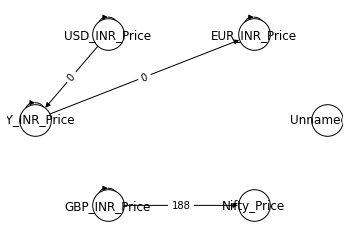

<Figure size 432x288 with 0 Axes>

In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --plot  --hidden_layers 3 --epochs 1000 --log_interval 250  --data /content/gdrive/MyDrive/DBA/data/only_exchange_rate.csv

Arguments: Namespace(cuda=False, data=['/content/gdrive/MyDrive/DBA/data/only_sentiment_normal_df.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=3, kernel_size=4, learning_rate=0.01, log_interval=250, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  only_sentiment_normal_df.csv

 Analysis started for target:  Unnamed: 0
Epoch:  1 [0%] 	Loss: 235898.906250
Epoch: 250 [25%] 	Loss: 116.491646
Epoch: 500 [50%] 	Loss: 71.498276
Epoch: 750 [75%] 	Loss: 53.500458
Epoch: 1000 [100%] 	Loss: 42.236927
Potential causes:  [0]
Validated causes:  []

 Analysis started for target:  CARDINAL_MoneyControl
Epoch:  1 [0%] 	Loss: 0.998265
Epoch: 250 [25%] 	Loss: 0.302856
Epoch: 500 [50%] 	Loss: 0.173603
Epoch: 750 [75%] 	Loss: 0.133007
Epoch: 1000 [100%] 	Loss: 0.105584
Potential causes:  [38, 37, 12, 27, 40]
Validated causes:  []

 Analysis started for target:  DATE_MoneyControl
Epoch:  1 [0%] 	Loss: 0.998359
Epoch: 250 [25%] 	Loss: 0.085551
Epoch: 500 [

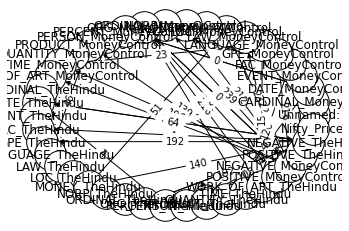

<Figure size 432x288 with 0 Axes>

In [ ]:
%run -i "runTCDF.py" --plot  --hidden_layers 3 --epochs 1000 --log_interval 250  --data /content/gdrive/MyDrive/DBA/data/only_sentiment_normal_df.csv

Arguments: Namespace(cuda=False, data=['data/demo_dataset.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  demo_dataset.csv

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.315027
Epoch: 500 [50%] 	Loss: 1.695510
Epoch: 1000 [100%] 	Loss: 1.694401
Potential causes:  [1]
Validated causes:  []

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.291189
Epoch: 500 [50%] 	Loss: 0.002134
Epoch: 1000 [100%] 	Loss: 0.002114
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.740447
Epoch: 500 [50%] 	Loss: 0.364763
Epoch: 1000 [100%] 	Loss: 0.364258
Potential causes:  [1, 0]
Validated causes:  [1]

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.264087
Epoch: 500 [50%] 	Loss: 1.657545
Epoch: 1000 [100%] 	Loss: 1.654903
Potential causes:  [3

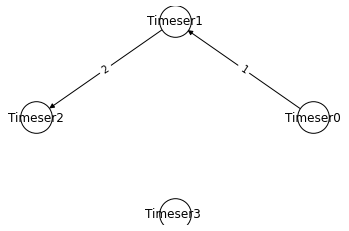

<Figure size 432x288 with 0 Axes>

In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --plot  --data data/demo_dataset.csv

In [ ]:
short_Df=entities_sentiment_merged_with_ndPrice_Df[['POSITIVE_MoneyControl',	'NEGATIVE_MoneyControl',	'POSITIVE_TheHindu',	'NEGATIVE_TheHindu','Next_Day_Price']]

In [ ]:
entities_sentiment_merged_with_ndPrice_Df=entities_sentiment_merged_with_ndPrice_Df.drop(columns=['Unnamed: 0'])

KeyError: ignored

In [ ]:
entities_sentiment_merged_with_ndPrice_without_date=entities_sentiment_merged_with_ndPrice_Df.drop(columns=['NEWS_DATE'])

In [ ]:
entities_sentiment_merged_with_ndPrice_without_date.head()

CARDINAL_MoneyControl  DATE_MoneyControl  EVENT_MoneyControl  \
0                      9                 37                   1   
1                      6                 20                   0   
2                      8                 37                   0   
3                      8                 41                   1   
4                      6                 33                   0   

   FAC_MoneyControl  GPE_MoneyControl  LANGUAGE_MoneyControl  \
0                 1                14                      0   
1                 0                 9                      0   
2                 2                48                      0   
3                 2                11                      0   
4                 2                20                      0   

   LAW_MoneyControl  LOC_MoneyControl  MONEY_MoneyControl  NORP_MoneyControl  \
0                 0                 0                  11                  0   
1                 4                 0                  10                  0   
2                 4                 4                  32                  2   
3                 0                 0                  30                  5   
4                 1                 0                   9                  3   

   ...  PRODUCT_TheHindu  QUANTITY_TheHindu  TIME_TheHindu  \
0  ...                 0                  0              0   
1  ...                 0                  1              0   
2  ...                 0                  0              0   
3  ...                 0                  0              0   
4  ...                 0                  0              0   

   WORK_OF_ART_TheHindu  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0                     0              11.047161              13.488099   
1                     0               8.663063              12.266859   
2                     0               6.373476              20.272146   
3                     0               5.917440              26.114586   
4                     0               6.288719              18.325561   

   POSITIVE_TheHindu  NEGATIVE_TheHindu  Next_Day_Price     Price  
0           1.870578           0.992632        11602.35  11565.75  
1           2.751783           0.666371        11586.70  11602.35  
2           0.645391           0.000000        11590.80  11586.70  
3           0.000000           1.580029        11776.85  11633.55  
4           0.923799           0.000000        11790.85  11776.85  

[5 rows x 42 columns]

In [ ]:
entities_sentiment_merged_with_ndPrice_without_date=(entities_sentiment_merged_with_ndPrice_without_date-entities_sentiment_merged_with_ndPrice_without_date.mean())/entities_sentiment_merged_with_ndPrice_without_date.std()

In [ ]:
entities_sentiment_merged_with_ndPrice_without_date=(entities_sentiment_merged_with_ndPrice_without_date-entities_sentiment_merged_with_ndPrice_without_date.min())/(entities_sentiment_merged_with_ndPrice_without_date.max()-entities_sentiment_merged_with_ndPrice_without_date.min())

In [ ]:
entities_sentiment_merged_with_ndPrice_without_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 842
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CARDINAL_MoneyControl     843 non-null    float64
 1   DATE_MoneyControl         843 non-null    float64
 2   EVENT_MoneyControl        843 non-null    float64
 3   FAC_MoneyControl          843 non-null    float64
 4   GPE_MoneyControl          843 non-null    float64
 5   LANGUAGE_MoneyControl     843 non-null    float64
 6   LAW_MoneyControl          843 non-null    float64
 7   LOC_MoneyControl          843 non-null    float64
 8   MONEY_MoneyControl        843 non-null    float64
 9   NORP_MoneyControl         843 non-null    float64
 10  ORDINAL_MoneyControl      843 non-null    float64
 11  ORG_MoneyControl          843 non-null    float64
 12  PERCENT_MoneyControl      843 non-null    float64
 13  PERSON_MoneyControl       843 non-null    float64
 14  PRODUCT_Mo

In [ ]:
!pwd

/content/gdrive/MyDrive/DBA/TCDF


In [ ]:
cd ..

/content/gdrive/MyDrive/DBA


In [ ]:
entities_sentiment_merged_with_ndPrice_without_date.to_csv('data/full_data.csv')

In [ ]:
entities_sentiment_merged_with_ndPrice_without_date

CARDINAL_MoneyControl  DATE_MoneyControl  EVENT_MoneyControl  \
0                 0.142857           0.103746            0.032258   
1                 0.095238           0.054755            0.000000   
2                 0.126984           0.103746            0.000000   
3                 0.126984           0.115274            0.032258   
4                 0.095238           0.092219            0.000000   
..                     ...                ...                 ...   
838               0.142857           0.023055            0.000000   
839               0.015873           0.031700            0.000000   
840               0.126984           0.034582            0.064516   
841               0.047619           0.046110            0.064516   
842               0.015873           0.025937            0.000000   

     FAC_MoneyControl  GPE_MoneyControl  LANGUAGE_MoneyControl  \
0                0.25          0.197183                    0.0   
1                0.00          0.126761                    0.0   
2                0.50          0.676056                    0.0   
3                0.50          0.154930                    0.0   
4                0.50          0.281690                    0.0   
..                ...               ...                    ...   
838              0.00          0.154930                    0.0   
839              0.00          0.140845                    0.0   
840              0.00          0.028169                    0.0   
841              0.00          0.014085                    0.0   
842              0.00          0.126761                    0.0   

     LAW_MoneyControl  LOC_MoneyControl  MONEY_MoneyControl  \
0              0.0000          0.000000            0.101852   
1              0.2500          0.000000            0.092593   
2              0.2500          0.363636            0.296296   
3              0.0000          0.000000            0.277778   
4              0.0625          0.000000            0.083333   
..                ...               ...                 ...   
838            0.1250          0.000000            0.064815   
839            0.0625          0.181818            0.000000   
840            0.0000          0.000000            0.027778   
841            0.0000          0.000000            0.027778   
842            0.1250          0.000000            0.018519   

     NORP_MoneyControl  ...  PRODUCT_TheHindu  QUANTITY_TheHindu  \
0             0.000000  ...               0.0           0.000000   
1             0.000000  ...               0.0           0.333333   
2             0.181818  ...               0.0           0.000000   
3             0.454545  ...               0.0           0.000000   
4             0.272727  ...               0.0           0.000000   
..                 ...  ...               ...                ...   
838           0.000000  ...               0.0           0.000000   
839           0.090909  ...               0.0           0.000000   
840           0.090909  ...               0.0           0.000000   
841           0.272727  ...               0.0           0.000000   
842           0.000000  ...               0.0           0.000000   

     TIME_TheHindu  WORK_OF_ART_TheHindu  POSITIVE_MoneyControl  \
0              0.0                   0.0               0.126600   
1              0.0                   0.0               0.099278   
2              0.0                   0.0               0.073040   
3              0.0                   0.0               0.067814   
4              0.0                   0.0               0.072068   
..             ...                   ...                    ...   
838            0.0                   0.0               0.043243   
839            0.0                   0.0               0.052356   
840            0.0                   0.0               0.040104   
841            0.0                   0.0               0.049529   
842            0.0                   0.0               0.000000   

    

In [ ]:
cd TCDF

/content/gdrive/MyDrive/DBA/TCDF


Arguments: Namespace(cuda=False, data=['/content/gdrive/MyDrive/DBA/data/full_data.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=250, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  full_data.csv

 Analysis started for target:  Unnamed: 0
Epoch:  1 [0%] 	Loss: 236493.421875
Epoch: 250 [25%] 	Loss: 330.263702
Epoch: 500 [50%] 	Loss: 101.937202
Epoch: 750 [75%] 	Loss: 40.460415
Epoch: 1000 [100%] 	Loss: 18.288509
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  CARDINAL_MoneyControl
Epoch:  1 [0%] 	Loss: 0.018268
Epoch: 250 [25%] 	Loss: 0.003135
Epoch: 500 [50%] 	Loss: 0.002871
Epoch: 750 [75%] 	Loss: 0.002274
Epoch: 1000 [100%] 	Loss: 0.002162
Potential causes:  [12, 19, 5, 20, 8, 6, 4, 13, 25, 17, 27, 1, 34, 42, 3]
Validated causes:  []

 Analysis started for target:  DATE_MoneyControl
Epoch:  1 [0%] 	Loss: 0.009732
Epoch: 250 [25%] 	Loss: 0.000482
Epoch:

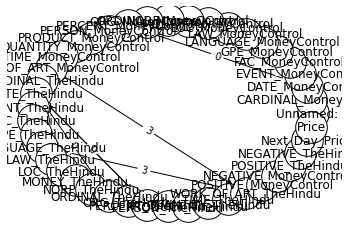

<Figure size 432x288 with 0 Axes>

In [ ]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --plot --epochs 1000 --log_interval 250  --data /content/gdrive/MyDrive/DBA/data/full_data.csv

##### Granger causality for causality detection

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df=dataframe_scaler(sentiment_all_exch_rate_all_indices_Df,'standard')

standard
apply standardization


In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df.head()

Unnamed: 0  FRANCE_INDEX_Price  GERMAN_INDEX_Price  UK_INDEX_Price  \
0   -1.728603            2.653987            1.033853        1.250953   
1   -1.724006            2.668725            0.925350        1.213752   
2   -1.719408            2.543275            0.839737        0.992935   
3   -1.714811            2.381184            0.700285        0.788711   
4   -1.710214            2.375014            0.641426        0.783722   

   USA_INDEX_Price  JAPAN_INDEX_Price  Unnamed: 0.1  EUR_INR_Price  \
0         2.228887           1.261432     -1.712801       0.275766   
1         2.265107           1.284430     -1.708701       0.368353   
2         2.149031           1.224161     -1.700499       0.570070   
3         2.080558           1.220460     -1.696399       0.563404   
4         1.949995           1.103622     -1.692298       0.556737   

   JPY_INR_Price  GBP_INR_Price  ...  QUANTITY_TheHindu  TIME_TheHindu  \
0      -0.380565       1.103233  ...          -0.164223      -0.123164   
1      -0.321062       1.134937  ...          -0.164223      -0.123164   
2       0.035959       1.161615  ...          -0.164223      -0.123164   
3       0.137115       1.104779  ...          -0.164223      -0.123164   
4       0.199593       1.027451  ...          -0.164223      -0.123164   

   WORK_OF_ART_TheHindu  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
0             -0.152173              -1.125393              -0.315552   
1             -0.152173              -0.233728              -0.425813   
2             -0.152173              -0.182838              -1.109812   
3             -0.152173              -0.346890              -0.377263   
4             -0.152173              -0.972244              -1.032619   

   POSITIVE_TheHindu  NEGATIVE_TheHindu  Nifty_Next_Day_Price  Nifty_Price  \
0           2.170494           1.581213              2.638625     2.642616   
1           0.668387           4.038663              2.632799     2.589526   
2          -0.774741          -0.479367              2.454095     2.411869   
3          -0.774741          -0.097111              2.402564     2.361840   
4           2.117404          -1.156350              2.352647     2.263621   

   USD_INR_Price  
0       0.846053  
1       0.895802  
2       1.181458  
3       1.260093  
4       1.268118  

[5 rows x 54 columns]

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df.isnull().sum()

Unnamed: 0                  0
FRANCE_INDEX_Price          0
GERMAN_INDEX_Price          0
UK_INDEX_Price              0
USA_INDEX_Price             0
JAPAN_INDEX_Price           0
Unnamed: 0.1                0
EUR_INR_Price               0
JPY_INR_Price               0
GBP_INR_Price               0
Unnamed: 0.1.1              0
CARDINAL_MoneyControl       0
DATE_MoneyControl           0
EVENT_MoneyControl          0
FAC_MoneyControl            0
GPE_MoneyControl            0
LANGUAGE_MoneyControl       0
LAW_MoneyControl            0
LOC_MoneyControl            0
MONEY_MoneyControl          0
NORP_MoneyControl           0
ORDINAL_MoneyControl        0
ORG_MoneyControl            0
PERCENT_MoneyControl        0
PERSON_MoneyControl         0
PRODUCT_MoneyControl        0
QUANTITY_MoneyControl       0
TIME_MoneyControl           0
WORK_OF_ART_MoneyControl    0
CARDINAL_TheHindu           0
DATE_TheHindu               0
EVENT_TheHindu              0
FAC_TheHindu                0
GPE_TheHin

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Nifty_Next_Day_Price'],axis=1,inplace=True)

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df

FRANCE_INDEX_Price  GERMAN_INDEX_Price  UK_INDEX_Price  USA_INDEX_Price  \
875            0.181395            0.236576        0.973984         0.048594   
874            0.188123            0.264485        0.997756         0.055125   
873            0.197245            0.260889        0.865803         0.055710   
872            0.190324            0.241461        0.882785         0.053955   
871            0.192339            0.192859        0.898541         0.056636   
..                  ...                 ...             ...              ...   
4              0.892435            0.673093        0.714889         0.947848   
3              0.929180            0.706208        0.750699         0.967198   
2              0.937169            0.721337        0.759875         0.975484   
1              0.957620            0.726539        0.789419         1.000000   
0              0.954278            0.752305        0.795942         0.989765   

     JAPAN_INDEX_Price  EUR_INR_Price  JPY_INR_Price  GBP_INR_Price  \
875           0.294313       0.034553       0.012539       0.106773   
874           0.294736       0.013264       0.000000       0.108174   
873           0.296571       0.000000       0.029467       0.119991   
872           0.294030       0.001054       0.068339       0.107660   
871           0.291914       0.042749       0.076489       0.120691   
..                 ...            ...            ...            ...   
4             0.792408       0.639233       0.652038       0.782952   
3             0.793395       0.641069       0.630721       0.796684   
2             0.811671       0.610801       0.598119       0.791546   
1             0.809483       0.585499       0.555486       0.790238   
0             0.803345       0.559992       0.542947       0.782578   

     SGD_INR_Price  MUR_INR_Price  ...  TIME  WORK_OF_ART  \
875       0.006204       0.410131  ...   0.0          0.0   
874       0.007091       0.386062  ...   0.0          0.0   
873       0.000000       0.403084  ...   0.0          0.0   
872       0.000997       0.392331  ...   0.0          0.0   
871       0.025482       0.395290  ...   0.0          0.0   
..             ...            ...  ...   ...          ...   
4         0.863505       0.152359  ...   0.0          0.0   
3         0.852648       0.147544  ...   0.0          0.0   
2         0.834146       0.120241  ...   0.0          0.0   
1         0.824507       0.123302  ...   0.0          0.0   
0         0.811434       0.087225  ...   0.0          0.0   

     POSITIVE_MoneyControl  NEGATIVE_MoneyControl  POSITIVE_TheHindu  \
875               0.092263               0.286058           0.000000   
874               0.067814               0.195478           0.000000   
873               0.069361               0.138587           0.000000   
872               0.093919               0.155964           0.179748   
871               0.120615               0.176335           0.180848   
..                     ...                    ...                ...   
4                 0.043243               0.056883           0.000000   
3                 0.052356               0.016842           0.000000   
2                 0.049248               0.021887           0.000000   
1                 0.049529               0.054229           0.172216   
0                 0.000000               0.060256           0.351470   

     NEGATIVE_TheHindu  POSITIVE  NEGATIVE  Nifty_Price  USD_INR_Price  
875           0.000000  0.202882  0.245956     0.014964       0.004400  
874           0.094280  0.000000  0.212991     0.016520       0.000000  
873           0.104962  0.000000  0.000000     0.022244       0.024202  
872           0.059664  0.000000  0.000000     0.031846       0.021269  
871           0.118128  0.000000  0.000000     0.033607       0.025669  
..                 ...       ...       ...          ...            ...  
4             0.118716  0.000000  0.327914     0.926066       0.906857  
3        

###### ADF Test for stationarity

In [ ]:
## Null hypothesis: If failed to be rejected, it suggests the time series is not stationarity

## Alternative hypothesis: The null hypothesis is rejected, it suggests the time series is stationary

n_obs = 53
df_train, df_test = sentiment_all_exch_rate_all_indices_normal_Df[0:-n_obs], sentiment_all_exch_rate_all_indices_normal_Df[-n_obs:]

In [ ]:
df_train.shape, df_test.shape

((823, 72), (53, 72))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    res_dict={}
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    res_dict['ADF Statistics']=result[0]
    print('p-value: %f' % result[1])
    res_dict['p-value']=result[1]
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return res_dict

In [ ]:
df_train.columns

Index(['FRANCE_INDEX_Price', 'GERMAN_INDEX_Price', 'UK_INDEX_Price',
       'USA_INDEX_Price', 'JAPAN_INDEX_Price', 'EUR_INR_Price',
       'JPY_INR_Price', 'GBP_INR_Price', 'SGD_INR_Price', 'MUR_INR_Price',
       'CARDINAL_MoneyControl', 'DATE_MoneyControl', 'EVENT_MoneyControl',
       'FAC_MoneyControl', 'GPE_MoneyControl', 'LANGUAGE_MoneyControl',
       'LAW_MoneyControl', 'LOC_MoneyControl', 'MONEY_MoneyControl',
       'NORP_MoneyControl', 'ORDINAL_MoneyControl', 'ORG_MoneyControl',
       'PERCENT_MoneyControl', 'PERSON_MoneyControl', 'PRODUCT_MoneyControl',
       'QUANTITY_MoneyControl', 'TIME_MoneyControl',
       'WORK_OF_ART_MoneyControl', 'CARDINAL_TheHindu', 'DATE_TheHindu',
       'EVENT_TheHindu', 'FAC_TheHindu', 'GPE_TheHindu', 'LANGUAGE_TheHindu',
       'LAW_TheHindu', 'LOC_TheHindu', 'MONEY_TheHindu', 'NORP_TheHindu',
       'ORDINAL_TheHindu', 'ORG_TheHindu', 'PERCENT_TheHindu',
       'PERSON_TheHindu', 'PRODUCT_TheHindu', 'QUANTITY_TheHindu',
       'TIME_TheHi

In [ ]:
non_stationary_cols=[]
for col in df_train.columns:
  print(f'ADF Test: {col} time series')
  out=adf_test(df_train[col])
  if out['p-value']>0.05:
    non_stationary_cols.append(col)


ADF Test: FRANCE_INDEX_Price time series
ADF Statistics: -0.116228
p-value: 0.947798
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: GERMAN_INDEX_Price time series
ADF Statistics: -2.833310
p-value: 0.053671
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: UK_INDEX_Price time series
ADF Statistics: -2.998068
p-value: 0.035075
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: USA_INDEX_Price time series
ADF Statistics: 0.333536
p-value: 0.978832
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: JAPAN_INDEX_Price time series
ADF Statistics: -0.873075
p-value: 0.796710
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: EUR_INR_Price time series
ADF Statistics: -1.834185
p-value: 0.363627
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: JPY_INR_Price time series
ADF Statistics: -2.538539
p-value: 0.106377
Critical values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
ADF Test: GBP_INR_Price time series
ADF Statis

In [ ]:
non_stationary_cols

['FRANCE_INDEX_Price',
 'GERMAN_INDEX_Price',
 'USA_INDEX_Price',
 'JAPAN_INDEX_Price',
 'EUR_INR_Price',
 'JPY_INR_Price',
 'GBP_INR_Price',
 'SGD_INR_Price',
 'MUR_INR_Price',
 'Nifty_Price',
 'USD_INR_Price']

###### KPSS test for Stationary

In [ ]:
#Null hypothesis: The time series is stationarity

#Alternative hypothesis: The time series is non-stationary
from statsmodels.tsa.stattools import kpss

def kpss_test(df):
    res_dict={}
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    print(f'KPSS Statistic: {statistic}')
    res_dict['KPSS Statistic']=statistic
    print(f'p-value: {p_value}')
    res_dict['p-value']=p_value
    print(f'num lags: {n_lags}')
    res_dict['num lags']=n_lags
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    return res_dict

In [ ]:
non_stationary_cols_kpss=[]
for col in df_train.columns:
  print(f'KPSS Test: {col} time series')
  out=kpss_test(df_train[col])
  if out['p-value']<0.05:
    non_stationary_cols_kpss.append(col)

KPSS Test: FRANCE_INDEX_Price time series
KPSS Statistic: 3.1244381050149683
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: GERMAN_INDEX_Price time series
KPSS Statistic: 1.427372926897368
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: UK_INDEX_Price time series
KPSS Statistic: 0.3709916920925215
p-value: 0.08965875340839591
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: USA_INDEX_Price time series
KPSS Statistic: 4.033385786028706
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: JAPAN_INDEX_Price time series
KPSS Statistic: 3.378481512766944
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: EUR_INR_Price time series
KPSS Statistic: 2.974136856928783
p-value: 0.01
num lags: 18
Cri

/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

In [ ]:
non_stationary_cols_kpss

['FRANCE_INDEX_Price',
 'GERMAN_INDEX_Price',
 'USA_INDEX_Price',
 'JAPAN_INDEX_Price',
 'EUR_INR_Price',
 'JPY_INR_Price',
 'GBP_INR_Price',
 'SGD_INR_Price',
 'MUR_INR_Price',
 'CARDINAL_MoneyControl',
 'DATE_MoneyControl',
 'FAC_MoneyControl',
 'GPE_MoneyControl',
 'LAW_MoneyControl',
 'MONEY_MoneyControl',
 'NORP_MoneyControl',
 'ORG_MoneyControl',
 'PERCENT_MoneyControl',
 'PERSON_MoneyControl',
 'PRODUCT_MoneyControl',
 'QUANTITY_MoneyControl',
 'TIME_MoneyControl',
 'DATE_TheHindu',
 'MONEY_TheHindu',
 'ORDINAL_TheHindu',
 'PERCENT_TheHindu',
 'DATE',
 'MONEY',
 'ORDINAL',
 'PERCENT',
 'POSITIVE_MoneyControl',
 'NEGATIVE_MoneyControl',
 'POSITIVE',
 'NEGATIVE',
 'Nifty_Price',
 'USD_INR_Price']

In [ ]:
df_train[non_stationary_cols_kpss]

FRANCE_INDEX_Price  GERMAN_INDEX_Price  USA_INDEX_Price  \
875            0.181395            0.236576         0.048594   
874            0.188123            0.264485         0.055125   
873            0.197245            0.260889         0.055710   
872            0.190324            0.241461         0.053955   
871            0.192339            0.192859         0.056636   
..                  ...                 ...              ...   
57             0.755230            0.613463         0.772091   
56             0.740852            0.599159         0.790466   
55             0.713858            0.563180         0.759809   
54             0.728376            0.569836         0.778281   
53             0.718544            0.571391         0.787103   

     JAPAN_INDEX_Price  EUR_INR_Price  JPY_INR_Price  GBP_INR_Price  \
875           0.294313       0.034553       0.012539       0.106773   
874           0.294736       0.013264       0.000000       0.108174   
873           0.296571       0.000000       0.029467       0.119991   
872           0.294030       0.001054       0.068339       0.107660   
871           0.291914       0.042749       0.076489       0.120691   
..                 ...            ...            ...            ...   
57            0.894722       0.672426       0.660188       0.760112   
56            0.856971       0.676371       0.673354       0.783279   
55            0.844059       0.724051       0.702194       0.833582   
54            0.804685       0.709699       0.680878       0.838440   
53            0.792690       0.706503       0.695925       0.835170   

     SGD_INR_Price  MUR_INR_Price  CARDINAL_MoneyControl  ...      DATE  \
875       0.006204       0.410131               0.285714  ...  0.000000   
874       0.007091       0.386062               0.126984  ...  0.076923   
873       0.000000       0.403084               0.031746  ...  0.076923   
872       0.000997       0.392331               0.095238  ...  0.115385   
871       0.025482       0.395290               0.158730  ...  0.076923   
..             ...            ...                    ...  ...       ...   
57        0.769333       0.100279               0.111111  ...  0.307692   
56        0.770552       0.089877               0.031746  ...  0.307692   
55        0.805451       0.121368               0.015873  ...  0.153846   
54        0.801795       0.106615               0.079365  ...  0.192308   
53        0.811988       0.140138               0.095238  ...  0.076923   

     MONEY  ORDINAL  PERCENT  POSITIVE_MoneyControl  NEGATIVE_MoneyControl  \
875   0.00      0.0     0.00               0.092263               0.286058   
874   0.00      0.0     0.10               0.067814               0.195478   
873   0.00      0.0     0.10               0.069361               0.138587   
872   0.00      0.0     0.05               0.093919               0.155964   
871   0.00      0.0     0.00               0.120615               0.176335   
..     ...      ...      ...                    ...                    ...   
57    0.25      0.0     0.40               0.010573               0.044447   
56    0.25      0.0     0.15               0.058239               0.054026   
55    0.00      0.0     0.10               0.010815               0.030501   
54    0.00      0.0     0.00               0.081710               0.067898   
53    0.25      0.0     0.05               0.052259               0.082529   

     POSITIVE  NEGATIVE  Nifty_Price  USD_INR_Price  
875  0.202882  0.245956     0.014964       0.004400  
874  0.000000  0.212991     0.016520       0.000000  
873  0.000000  0.000000     0.022244       0.024202  
872  0.000000  0.000000     0.031846       0.021269  
871  0.000000  0.000000     0.033607       0.025669  
..        ...       ...          ...            ...  
57   0.000000  0.063726     0.867871       0.794279  
56   0.375241  0.209301     0.858868       0.792813  
55   0.129526  0.210585     0.871443       0.824936  
54   

In [ ]:
df_train_transformed = df_train.diff().dropna()

In [ ]:
df_train_transformed=df_train_transformed.diff().dropna()

In [ ]:
df_train_transformed=df_train_transformed.diff().dropna()

In [ ]:
non_stationary_cols_kpss=[]
for col in df_train_transformed.columns:
  print(f'KPSS Test: {col} time series')
  out=kpss_test(df_train[col])
  if out['p-value']<0.05:
    non_stationary_cols_kpss.append(col)

KPSS Test: FRANCE_INDEX_Price time series
KPSS Statistic: 3.1244381050149683
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: GERMAN_INDEX_Price time series
KPSS Statistic: 1.427372926897368
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: UK_INDEX_Price time series
KPSS Statistic: 0.3709916920925215
p-value: 0.08965875340839591
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: USA_INDEX_Price time series
KPSS Statistic: 4.033385786028706
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: JAPAN_INDEX_Price time series
KPSS Statistic: 3.378481512766944
p-value: 0.01
num lags: 18
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: EUR_INR_Price time series
KPSS Statistic: 2.974136856928783
p-value: 0.01
num lags: 18
Cri

/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The

In [ ]:
len(non_stationary_cols_kpss)

36

In [ ]:
from statsmodels.tsa.api import VAR

model = VAR(df_train)
for i in [10,20,30]:
    result = model.fit(i)
    print('Lag Order =', i)
# print('AIC : ', result.aic)
#     print('BIC : ', result.bic)
#     print('FPE : ', result.fpe)
#     print('HQIC: ', result.hqic, '\n')

/home/rxlogix/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 10
Lag Order = 20
Lag Order = 30


In [ ]:
results = model.fit(maxlags=20, ic='aic')
results.summary()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
maxlag=20
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

granger_causality_results_20=grangers_causation_matrix(df_train_transformed, variables = df_train_transformed.columns)

In [ ]:
!pwd

/content/gdrive/MyDrive/DBA


In [ ]:
granger_causality_results_20.to_excel('/content/gdrive/MyDrive/DBA/data/causality_results_20.xlsx')

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
maxlag=30
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

granger_causality_results_30=grangers_causation_matrix(df_train_transformed, variables = df_train_transformed.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


In [ ]:
granger_causality_results_30.to_excel('/content/gdrive/MyDrive/DBA/data/causality_results_30.xlsx')

##### Causal inference with Do Why Library

In [ ]:
! pip install dowhy

/home/rxlogix/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/rxlogix/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 7.0 MB/s eta 0:00:00
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [ ]:
from dowhy import CausalModel

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df=dataframe_scaler(sentiment_all_exch_rate_all_indices_Df,'standard')

standard
apply standardization


In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Nifty_Next_Day_Price'],inplace=True)

KeyError: "['Unnamed: 0' 'Unnamed: 0.1' 'Unnamed: 0.1.1' 'Nifty_Next_Day_Price'] not found in axis"

In [ ]:
sentiment_all_exch_rate_all_indices_normal_Df.head()

FRANCE_INDEX_Price  GERMAN_INDEX_Price  UK_INDEX_Price  USA_INDEX_Price  \
875            0.181395            0.236576        0.973984         0.048594   
874            0.188123            0.264485        0.997756         0.055125   
873            0.197245            0.260889        0.865803         0.055710   
872            0.190324            0.241461        0.882785         0.053955   
871            0.192339            0.192859        0.898541         0.056636   

     JAPAN_INDEX_Price  EUR_INR_Price  JPY_INR_Price  GBP_INR_Price  \
875           0.294313       0.034553       0.012539       0.106773   
874           0.294736       0.013264       0.000000       0.108174   
873           0.296571       0.000000       0.029467       0.119991   
872           0.294030       0.001054       0.068339       0.107660   
871           0.291914       0.042749       0.076489       0.120691   

     SGD_INR_Price  MUR_INR_Price  ...  TIME  WORK_OF_ART  \
875       0.006204       0.410131  ...   0.0          0.0   
874       0.007091       0.386062  ...   0.0          0.0   
873       0.000000       0.403084  ...   0.0          0.0   
872       0.000997       0.392331  ...   0.0          0.0   
871       0.025482       0.395290  ...   0.0          0.0   

     POSITIVE_MoneyControl  NEGATIVE_MoneyControl  POSITIVE_TheHindu  \
875               0.092263               0.286058           0.000000   
874               0.067814               0.195478           0.000000   
873               0.069361               0.138587           0.000000   
872               0.093919               0.155964           0.179748   
871               0.120615               0.176335           0.180848   

     NEGATIVE_TheHindu  POSITIVE  NEGATIVE  Nifty_Price  USD_INR_Price  
875           0.000000  0.202882  0.245956     0.014964       0.004400  
874           0.094280  0.000000  0.212991     0.016520       0.000000  
873           0.104962  0.000000  0.000000     0.022244       0.024202  
872           0.059664  0.000000  0.000000     0.031846       0.021269  
871           0.118128  0.000000  0.000000     0.033607       0.025669  

[5 rows x 72 columns]

In [ ]:
all_columns=list(sentiment_all_exch_rate_all_indices_normal_Df.columns)

In [ ]:
target_column='Nifty_Price'
treatment_col_list=[col for col in all_columns if col!=target_column]

In [ ]:
[col for col in all_columns if col!=target_column]

['FRANCE_INDEX_Price',
 'GERMAN_INDEX_Price',
 'UK_INDEX_Price',
 'USA_INDEX_Price',
 'JAPAN_INDEX_Price',
 'EUR_INR_Price',
 'JPY_INR_Price',
 'GBP_INR_Price',
 'SGD_INR_Price',
 'MUR_INR_Price',
 'CARDINAL_MoneyControl',
 'DATE_MoneyControl',
 'EVENT_MoneyControl',
 'FAC_MoneyControl',
 'GPE_MoneyControl',
 'LANGUAGE_MoneyControl',
 'LAW_MoneyControl',
 'LOC_MoneyControl',
 'MONEY_MoneyControl',
 'NORP_MoneyControl',
 'ORDINAL_MoneyControl',
 'ORG_MoneyControl',
 'PERCENT_MoneyControl',
 'PERSON_MoneyControl',
 'PRODUCT_MoneyControl',
 'QUANTITY_MoneyControl',
 'TIME_MoneyControl',
 'WORK_OF_ART_MoneyControl',
 'CARDINAL_TheHindu',
 'DATE_TheHindu',
 'EVENT_TheHindu',
 'FAC_TheHindu',
 'GPE_TheHindu',
 'LANGUAGE_TheHindu',
 'LAW_TheHindu',
 'LOC_TheHindu',
 'MONEY_TheHindu',
 'NORP_TheHindu',
 'ORDINAL_TheHindu',
 'ORG_TheHindu',
 'PERCENT_TheHindu',
 'PERSON_TheHindu',
 'PRODUCT_TheHindu',
 'QUANTITY_TheHindu',
 'TIME_TheHindu',
 'WORK_OF_ART_TheHindu',
 'CARDINAL',
 'DATE',
 'EVENT

In [ ]:
all_results_list=[]
for col in treatment_col_list:
  dict_dowhy={}
  model=CausalModel(
        data = sentiment_all_exch_rate_all_indices_normal_Df,
        treatment=col,
        outcome=target_column,
        common_causes=[col1 for col1 in treatment_col_list if col1!=col]
        )
  dict_dowhy['treatment']=col
  identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
  #Causal Effect Estimation
  estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression", test_significance=True)
  refutel = model.refute_estimate(identified_estimand,estimate, "random_common_cause")
  dict_dowhy['RCC_estimated_effect']=refutel.estimated_effect
  dict_dowhy['RCC_new_effect']=refutel.new_effect
  dict_dowhy['RCC_p_value']=refutel.refutation_result['p_value']
  refute2_results=model.refute_estimate(identified_estimand, estimate,method_name="placebo_treatment_refuter")
  dict_dowhy['PTR_estimated_effect']=refute2_results.estimated_effect
  dict_dowhy['PTR_new_effect']=refute2_results.new_effect
  dict_dowhy['PTR_p_value']=refute2_results.refutation_result['p_value']
  refute3_results=model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
  dict_dowhy['DSR_estimated_effect']=refute3_results.estimated_effect
  dict_dowhy['DSR_new_effect']=refute3_results.new_effect
  dict_dowhy['DSR_p_value']=refute3_results.refutation_result['p_value']
  all_results_list.append(dict_dowhy)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance':

In [ ]:
drefutel.refutation_result['p_value']

In [ ]:
!pwd

/content/gdrive/MyDrive/DBA


In [ ]:
# open a file, where you ant to store the data
import pickle as pkl
file = open('data/dowhyresult.pkl', 'wb')

# dump information to that file
pkl.dump(all_results_list, file)

# close the file
file.close()

In [ ]:
dowhy_result_df=pd.DataFrame(all_results_list)

In [ ]:
!pwd

/content/gdrive/MyDrive/DBA


In [ ]:
dowhy_result_df.to_csv('data/dowhy_results.csv')

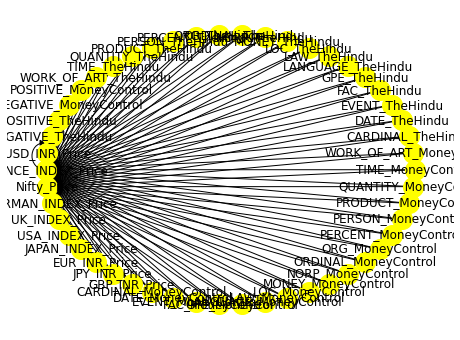

In [ ]:
model.view_model()

In [ ]:
import dowhy.datasets

# Load some sample data
# data = dowhy.datasets.linear_dataset(
#     beta=10,
#     num_common_causes=5,
#     num_instruments=2,
#     num_samples=10000,
#     treatment_is_binary=True)

In [ ]:
short_Df=entities_sentiment_merged_with_ndPrice_Df[['POSITIVE_MoneyControl',	'NEGATIVE_MoneyControl',	'POSITIVE_TheHindu',	'NEGATIVE_TheHindu',	'Next_Day_Price','Price']]

In [ ]:
short_Df

POSITIVE_MoneyControl  NEGATIVE_MoneyControl  POSITIVE_TheHindu  \
0                11.047161              13.488099           1.870578   
1                 8.663063              12.266859           2.751783   
2                 6.373476              20.272146           0.645391   
3                 5.917440              26.114586           0.000000   
4                 6.288719              18.325561           0.923799   
..                     ...                    ...                ...   
838               3.773418               8.156194           0.000000   
839               4.568582               2.967970           0.000000   
840               3.499479               4.845478           2.901504   
841               4.321918               7.812341           1.731223   
842               0.000000               8.593254           3.533199   

     NEGATIVE_TheHindu  Next_Day_Price     Price  
0             0.992632        11602.35  11565.75  
1             0.666371        11586.70  11602.35  
2             0.000000        11590.80  11586.70  
3             1.580029        11776.85  11633.55  
4             0.000000        11790.85  11776.85  
..                 ...             ...       ...  
838           1.989559        36989.15  36627.15  
839           1.271572        37362.85  36989.15  
840           3.408256        38357.80  37988.50  
841           9.757745        38658.80  38274.65  
842           5.141939        38701.05  38658.80  

[843 rows x 6 columns]

In [ ]:
entities_sentiment_merged_with_ndPrice_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 842
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                843 non-null    int64         
 1   NEWS_DATE                 843 non-null    datetime64[ns]
 2   CARDINAL_MoneyControl     843 non-null    int64         
 3   DATE_MoneyControl         843 non-null    int64         
 4   EVENT_MoneyControl        843 non-null    int64         
 5   FAC_MoneyControl          843 non-null    int64         
 6   GPE_MoneyControl          843 non-null    int64         
 7   LANGUAGE_MoneyControl     843 non-null    int64         
 8   LAW_MoneyControl          843 non-null    int64         
 9   LOC_MoneyControl          843 non-null    int64         
 10  MONEY_MoneyControl        843 non-null    int64         
 11  NORP_MoneyControl         843 non-null    int64         
 12  ORDINAL_MoneyControl  

In [ ]:
#Creating the
causal_graph = """
digraph {
POSITIVE_MoneyControl;
Next_Day_Price;
NEGATIVE_MoneyControl;
POSITIVE_TheHindu;
NEGATIVE_TheHindu;
FAC_MoneyControl;
U[label="Unobserved Confounders"];
POSITIVE_MoneyControl -> Next_Day_Price; NEGATIVE_MoneyControl -> Next_Day_Price;
POSITIVE_TheHindu -> Next_Day_Price; NEGATIVE_TheHindu->Next_Day_Price;
FAC_MoneyControl -> Next_Day_Price;
U->POSITIVE_MoneyControl;U->NEGATIVE_MoneyControl;U->POSITIVE_TheHindu;U->NEGATIVE_TheHindu;U-> FAC_MoneyControl;
U->Next_Day_Price
}
"""

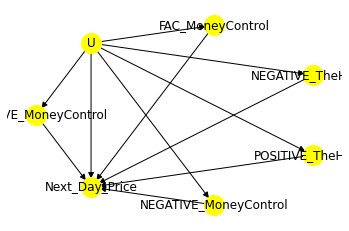

In [ ]:
from IPython.display import Image, display
model = CausalModel(
    data=entities_sentiment_merged_with_ndPrice_Df,
    graph=causal_graph.replace("\n", " "),
    treatment='FAC_MoneyControl',
    outcome='Next_Day_Price')
model.view_model()

In [ ]:
#Identify the causal effect
estimands = model.identify_effect(proceed_when_unidentifiable=True)
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(Next_Day_Price|POSITIVE_MoneyControl,NEGATIVE_
d[FAC_MoneyControl]                                                           

                                                  
MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{FAC_MoneyControl} and U→Next_Day_Price then P(Next_Day_Price|FAC_MoneyControl,POSITIVE_MoneyControl,NEGATIVE_MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu,U) = P(Next_Day_Price|FAC_MoneyControl,POSITIVE_MoneyControl,NEGATIVE_MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [ ]:
estimands.backdoor_variables

{'backdoor': ['POSITIVE_MoneyControl',
  'NEGATIVE_MoneyControl',
  'NEGATIVE_TheHindu',
  'POSITIVE_TheHindu'],
 'backdoor1': ['POSITIVE_MoneyControl',
  'NEGATIVE_MoneyControl',
  'NEGATIVE_TheHindu',
  'POSITIVE_TheHindu']}

In [ ]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands, method_name="backdoor.linear_regression", test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(Next_Day_Price|POSITIVE_MoneyControl,NEGATIVE_
d[FAC_MoneyControl]                                                           

                                                  
MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{FAC_MoneyControl} and U→Next_Day_Price then P(Next_Day_Price|FAC_MoneyControl,POSITIVE_MoneyControl,NEGATIVE_MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu,U) = P(Next_Day_Price|FAC_MoneyControl,POSITIVE_MoneyControl,NEGATIVE_MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu)

## Realized estimand
b: Next_Day_Price~FAC_MoneyControl+POSITIVE_MoneyControl+NEGATIVE_MoneyControl+NEGATIVE_TheHindu+POSITIVE_TheHindu+FAC

In [ ]:
! pip install econml

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(estimands,
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(Next_Day_Price|POSITIVE_MoneyControl,NEGATIVE_
d[FAC_MoneyControl]                                                           

                                                  
MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{FAC_MoneyControl} and U→Next_Day_Price then P(Next_Day_Price|FAC_MoneyControl,POSITIVE_MoneyControl,NEGATIVE_MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu,U) = P(Next_Day_Price|FAC_MoneyControl,POSITIVE_MoneyControl,NEGATIVE_MoneyControl,NEGATIVE_TheHindu,POSITIVE_TheHindu)

## Realized estimand
b: Next_Day_Price~FAC_MoneyControl+POSITIVE_MoneyControl+NEGATIVE_MoneyControl+NEGATIVE_TheHindu+POSITIVE_TheHindu | P

In [ ]:
refutel = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a Random Common Cause
Estimated effect:-888.5153613801776
New effect:-890.7977809952718



In [ ]:
refute2_results=model.refute_estimate(estimands, estimate,
        method_name="placebo_treatment_refuter")
print(refute2_results)

Refute: Use a Placebo Treatment
Estimated effect:-888.5153613801776
New effect:5.576748661428865
p value:0.49



In [ ]:
refute3_results=model.refute_estimate(estimands, estimate,
        method_name="data_subset_refuter")
print(refute3_results)

Refute: Use a subset of data
Estimated effect:-888.5153613801776
New effect:-858.7533416840453
p value:0.46



In [ ]:
res_unobserved=model.refute_estimate(estimands, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

Refute: Add an Unobserved Common Cause
Estimated effect:-888.5153613801776
New effect:-883.8999524490173

